# Notebook for Star Clusters and Giant Molecular Clouds
### by Steven Umbarger

## Tables of Contents<br>
#### [Import Statements](#Import-Statements)
#### [Loading in Star and Gas Data](#Loading-in-the-snapshots)
#### [Data Organization](#Putting-the-data-into-arrays)
#### [Loading in GMC Data](#Loading-in-data-for-the-gmc)
#### [Friends of Friends](#Use-Friends-of-Friends-to-find-star-clusters)
#### [Matching Star IDs](#Get-the-ids-of-starclusters-to-match-with-future-snapshots)
#### [Plots](#Graphs)

## Import Statements

In [1]:
import sys
#sys.path.append("/home1/09528/sumbarger/simulation_analysis_tools/")  
### The line below is for working on this locally. Delete when back on stampede
sys.path.append("/Users/stevenumbarger/Research/Sarah/Jupyter_notebooks/GMC_project/Stampede/simulation_analysis_tools/")
import numpy as np
import math
import gizmo_analysis as gizmo  
import utilities as ut
from matplotlib import pylab as plt
from matplotlib.colors import LogNorm
from scipy import stats
from matplotlib import pyplot
import pickle
import matplotlib.patches as patches
from fof_analysis import fof
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

### Uncomment for making graphs more readable
#font = {'size'   : 20}
#matplotlib.rc('font', **font)
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20) 
#matplotlib.rcParams['figure.dpi'] = 300

#Lines below ensure that we can visualize all rows and columns in large data frames
pd.set_option('display.max_columns', 100) 
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', 100)

In [2]:
b_parsec    = 4 #mess with this
b_kpc       = b_parsec / 1000.
ncut_min    = 5 
age_cut_Myr = 3 #Myr
age_cut_Gyr = age_cut_Myr / 1000. #Gyr
softening   = 4. #res 7100
snaps = np.arange(640,643,1)
snap644 = 644

simname     = 'm12m_res7100'
#simdir      = '/scratch/projects/xsede/GalaxiesOnFIRE/cr_suite/m12m_r7100/mhdcv/1Myr'
#simdir      = '/scratch/projects/xsede/GalaxiesOnFIRE/metal_diffusion/m12m_r7100/1Myr' #simdir that works for m12m but not accurate
#simdir      = '/scratch/projects/xsede/GalaxiesOnFIRE/cr_suite/m12m_r7100/mhdcv/1Myr/'
#simdir     = '/scratch/projects/xsede/GalaxiesOnFIRE/cr_suite/m12i_r7100/mhdcv/1Myr/fire2/'
### The line below is for working locally
simdir      = '/Users/stevenumbarger/Research/Sarah/Jupyter_notebooks/GMC_project/sims/m12i_res7100'

## Loading in the snapshots

In [3]:
part640 = gizmo.io.Read.read_snapshots(['star', 'gas'],'index', snaps[0], simulation_directory=simdir, assign_hosts_rotation=True, assign_hosts=True)
part_641 = gizmo.io.Read.read_snapshots(['star'],'index', snaps[1], simulation_directory=simdir, assign_hosts_rotation=True, assign_hosts=True)
part_642 = gizmo.io.Read.read_snapshots(['star'],'index', snaps[2], simulation_directory=simdir, assign_hosts_rotation=True, assign_hosts=True)
part_644 = gizmo.io.Read.read_snapshots(['star'],'index', snap644, simulation_directory=simdir, assign_hosts_rotation=True, assign_hosts=True)


# in utilities.simulation.Snapshot():
* reading:  Users/stevenumbarger/Research/Sarah/Jupyter_notebooks/GMC_project/sims/m12i_res7100/snapshot_times.txt

  using snapshot index = 640, redshift = 0.004


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  Users/stevenumbarger/Research/Sarah/Jupyter_notebooks/GMC_project/sims/m12i_res7100/output/snapshot_640/snapshot_640.0.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 70514272 particles
    dark2     (id = 2): 5513331 particles
    gas       (id = 0): 55650202 particles
    star      (id = 4): 15338362 particles
    blackhole (id = 5): 0 particles

* reading the following
  species: ['star', 'gas']
  gas properties: ['acceleration', 'density', 'electron.fraction', 'hydrogen.neutral.fraction', 'id', 'id.child', 'id.generation', 'magnetic.field', 'mass', 'massfraction', 'photon.energy', 'position', 'potential', 'sfr', 'size', 'temperature', 'velocity']

* reading particles from:
    snapshot_

## Putting the data into arrays

In [4]:
part640['star'].keys()

dict_keys(['acceleration', 'position', 'mass', 'massfraction', 'id.child', 'id.generation', 'id', 'potential', 'form.scalefactor', 'velocity'])

In [5]:
#Loading snapshot 640 data into arrays

x_640             = part640['star'].prop('host.distance.principal.cartesian')[:,0]
y_640             = part640['star'].prop('host.distance.principal.cartesian')[:,1]
z_640             = part640['star'].prop('host.distance.principal.cartesian')[:,2]
rxyz_640          = part640['star'].prop('host.distance.total')
vx_640            = part640['star'].prop('host.velocity.principal.cartesian')[:,0]
vy_640            = part640['star'].prop('host.velocity.principal.cartesian')[:,1]
vz_640            = part640['star'].prop('host.velocity.principal.cartesian')[:,2]
age_640           = part640['star'].prop('age')
mass_640          = part640['star'].prop('mass')
feh_640           = part640['star'].prop('metallicity.fe')
ids_640           = part640['star']['id']
id_generation640  = part640['star']['id.generation']
id_child640       = part640['star']['id.child']

rxyz_641          = part_641['star'].prop('host.distance.total')
x_641             = part_641['star'].prop('host.distance.principal.cartesian')[:,0]
y_641             = part_641['star'].prop('host.distance.principal.cartesian')[:,1]
z_641             = part_641['star'].prop('host.distance.principal.cartesian')[:,2]
vx_641            = part_641['star'].prop('host.velocity.principal.cartesian')[:,0]
vy_641            = part_641['star'].prop('host.velocity.principal.cartesian')[:,1]
vz_641            = part_641['star'].prop('host.velocity.principal.cartesian')[:,2]
age_641           = part_641['star'].prop('age')
mass_641          = part_641['star'].prop('mass')
feh_641           = part_641['star'].prop('metallicity.fe')
ids_641           = part_641['star']['id']
id_generation_641 = part_641['star']['id.generation']
id_child_641      = part_641['star']['id.child']

rxyz_642          = part_642['star'].prop('host.distance.total')
x_642             = part_642['star'].prop('host.distance.principal.cartesian')[:,0]
y_642             = part_642['star'].prop('host.distance.principal.cartesian')[:,1]
z_642             = part_642['star'].prop('host.distance.principal.cartesian')[:,2]
vx_642            = part_642['star'].prop('host.velocity.principal.cartesian')[:,0]
vy_642            = part_642['star'].prop('host.velocity.principal.cartesian')[:,1]
vz_642            = part_642['star'].prop('host.velocity.principal.cartesian')[:,2]
age_642           = part_642['star'].prop('age')
mass_642          = part_642['star'].prop('mass')
feh_642           = part_642['star'].prop('metallicity.fe')
ids_642           = part_642['star']['id']
id_generation_642 = part_642['star']['id.generation']
id_child_642      = part_642['star']['id.child']

rxyz_644          = part_644['star'].prop('host.distance.total')
x_644             = part_644['star'].prop('host.distance.principal.cartesian')[:,0]
y_644             = part_644['star'].prop('host.distance.principal.cartesian')[:,1]
z_644             = part_644['star'].prop('host.distance.principal.cartesian')[:,2]
vx_644            = part_644['star'].prop('host.velocity.principal.cartesian')[:,0]
vy_644            = part_644['star'].prop('host.velocity.principal.cartesian')[:,1]
vz_644            = part_644['star'].prop('host.velocity.principal.cartesian')[:,2]
age_644           = part_644['star'].prop('age')
mass_644          = part_644['star'].prop('mass')
feh_644           = part_644['star'].prop('metallicity.fe')
ids_644           = part_644['star']['id']
id_generation_644 = part_644['star']['id.generation']
id_child_644      = part_644['star']['id.child']

### Graphs for Stars and Gass

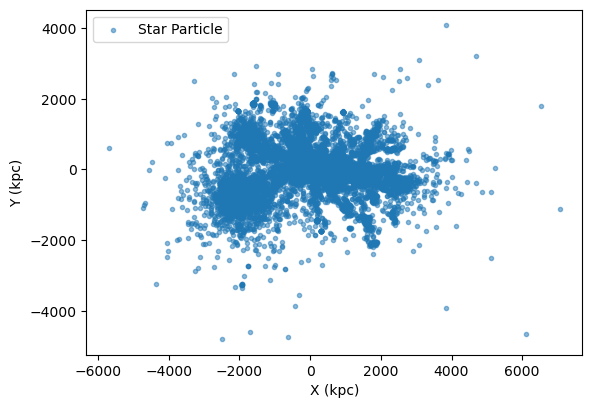

In [6]:
plt.style.use('default') #makes the background the default python

fig1, ax = plt.subplots() #sets up plot
ax.scatter(x_640, y_640, alpha=.5, marker=r'.', #says to plot x vs y with the color blue and marker as .
           label="Star Particle") #calls it gmc in legend
ax.set_xlabel("X (kpc)") #sets x axis label
ax.set_ylabel("Y (kpc)") #sets y axis label

ax.set_aspect('equal') #sets apsect ratio to be equal

#ax.set_xlim([-20, 20]) #sets x limit at -15 to 15
#ax.set_ylim([-20, 20]) #sets y limit at -15 to 15
ax.legend() #sets up legend

#plt.savefig('plot_x_vs_y.pdf') #saves plot as a pdf
#plt.savefig('plot_x_vs_y.png') #saves plot as a png

plt.show() #shows plot

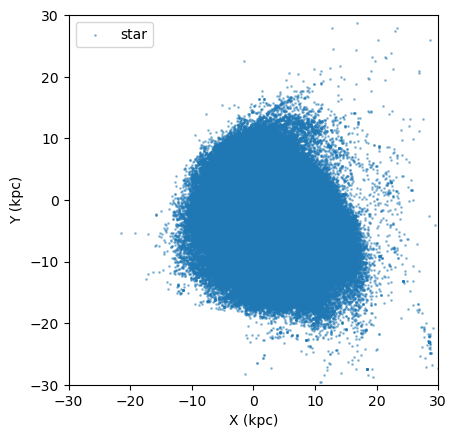

In [7]:
index = np.where(part640['star'].prop('age') < .5)
position = part640['star'].prop('host.distance.principal') #setting variable for position
posx = position[index][:,0] # the x position
posy = position[index][:,1] # the y position

fig1, ax = plt.subplots() #sets up plot
ax.scatter(posx, posy, s=1, marker=r'o', alpha = 0.4, #says to plot x vs y with the color blue and marker as o
           label="star") #calls it gmc in legend
ax.set_xlabel("X (kpc)") #sets x axis label
ax.set_ylabel("Y (kpc)") #sets y axis label

ax.set_aspect('equal') #sets apsect ratio to be equal

ax.set_xlim([-30, 30]) #sets x limit
ax.set_ylim([-30, 30]) #sets y limit
ax.legend() #sets up legend

plt.show()

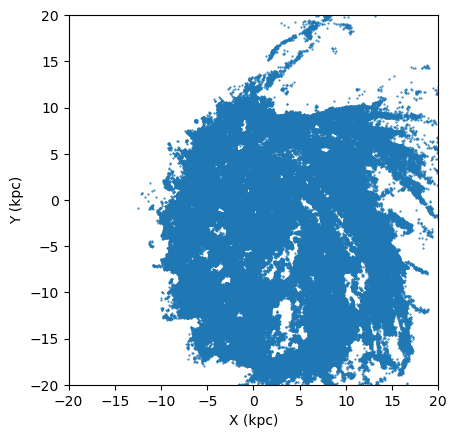

In [8]:
part640['gas']['position']

position = part640['gas'].prop('host.distance.principal') #setting variable for position
index = np.where(part640['gas'].prop('temperature') < 10**3)
gas_x640 = position[index][:,0] # the x position
gas_y640 = position[index][:,1] # the y position
gas_z640 = position[index][:,2] # the z position

fig1, ax = plt.subplots() #sets up plot
ax.scatter(gas_x640, gas_y640, s=1, marker='.') #make first plot x vs y with marker .
ax.set_xlabel('X (kpc)') #label x axis
ax.set_ylabel('Y (kpc)') #label y axis

ax.set_xlim([-20, 20]) #set x limit
ax.set_ylim([-20, 20]) #set y limit

ax.set_aspect('equal') #sets aspect ratio to equal

plt.show()

## Loading in data for the gmc

In [9]:
#for snapshot 640 of m12i
def data(pkl_path):
    filename = pkl_path + '/m12i_mhdcv_rl_640_whole20_indices_n20_z15_T1e4_ll20pc.pkl'
    with open(filename, 'rb') as handle: 
        cl_id1 = pickle.load(handle)
    filename = pkl_path + '/m12i_mhdcv_rl_640_whole20_m_n20_T1e4_z15_ll20pc.pkl'
    with open(filename, 'rb') as handle: 
        cl_id2 = pickle.load(handle)
    filename = pkl_path + '/m12i_mhdcv_rl_640_whole20_r50_n20_T1e4_z15_ll20pc.pkl'
    with open(filename, 'rb') as handle: 
        cl_id3 = pickle.load(handle)
    filename = pkl_path + '/m12i_mhdcv_rl_640_whole20_r90_n20_T1e4_z15_ll20pc.pkl'
    with open(filename, 'rb') as handle: 
        cl_id4 = pickle.load(handle)
    filename = pkl_path + '/m12i_mhdcv_rl_640_whole20_xcm_n20_T1e4_z15_ll20pc.pkl'
    with open(filename, 'rb') as handle: 
        cl_id5 = pickle.load(handle)
    filename = pkl_path + '/m12i_mhdcv_rl_640_whole20_ycm_n20_T1e4_z15_ll20pc.pkl'
    with open(filename, 'rb') as handle: 
        cl_id6 = pickle.load(handle)
    filename = pkl_path + '/m12i_mhdcv_rl_640_whole20_zcm_n20_T1e4_z15_ll20pc.pkl'
    with open(filename, 'rb') as handle: 
        cl_id7 = pickle.load(handle)
    return cl_id1, cl_id2, cl_id3, cl_id4, cl_id5, cl_id6, cl_id7

#pkl_path = '/home1/09528/sumbarger/GMC_project/m12i_cloud_1Myr/snapshot_640'

In [10]:
m12i_640 = data('/Users/stevenumbarger/Research/Sarah/Jupyter_notebooks/GMC_project/Stampede/GMC_project/m12i_cloud_1Myr/snapshot_640')

In [11]:
gind  = m12i_640[0]
gmtot = m12i_640[1]
gr50  = m12i_640[2]
gr90  = m12i_640[3]
gxcm  = m12i_640[4]
gycm  = m12i_640[5]
gzcm  = m12i_640[6]

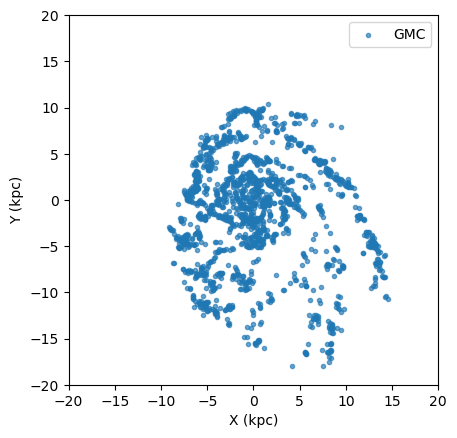

In [12]:
plt.style.use('default') #makes the background the default python

fig1, ax = plt.subplots() #sets up plot
ax.scatter(gxcm, gycm, alpha=.65, marker=r'.', #says to plot x vs y with the color blue and marker as .
           label="GMC") #calls it gmc in legend
ax.set_xlabel("X (kpc)") #sets x axis label
ax.set_ylabel("Y (kpc)") #sets y axis label

ax.set_aspect('equal') #sets apsect ratio to be equal

ax.set_xlim([-20, 20]) #sets x limit at -15 to 15
ax.set_ylim([-20, 20]) #sets y limit at -15 to 15
ax.legend() #sets up legend

#plt.savefig('plot_x_vs_y.pdf') #saves plot as a pdf
#plt.savefig('plot_x_vs_y.png') #saves plot as a png

plt.show() #shows plot

## Use Friends of Friends to find star clusters

In [13]:
#indices of stars we want to run fof on (to find star clusters)
si = np.where((age_640 <= age_cut_Gyr) & (rxyz_640 < 20) & (abs(z_640) < 1.5))
#Run fof
ind, xcm, ycm, zcm, mtot, grpid, r90, r50, rmax =fof.find(x_640[si],y_640[si],z_640[si], b=b_kpc, mass=mass_640[si], ncut=ncut_min)

linking length  0.004
min number particles in group  5
0.029558181762695312 seconds
number of groups 4
max number in a group 8


### Set arrays to the star clusters

In [14]:
#This is only for young stars at snapshot_640
xyoungstars    = x_640[si]
yyoungstars    = y_640[si]
zyoungstars    = z_640[si]
ageyoungstars  = age_640[si]*1000. #age in Myr
massyoungstars = mass_640[si]
idsyoungstars  = ids_640[si]

vxyoungstars   = vx_640[si]
vyyoungstars   = vy_640[si]
vzyoungstars   = vz_640[si]

In [15]:
#Saving information for each of the 4 clusters found at step 640
x_singlecluster_1    = xyoungstars[ind[0]] 
y_singlecluster_1    = yyoungstars[ind[0]]
z_singlecluster_1    = zyoungstars[ind[0]]
vx_singlecluster_1   = vxyoungstars[ind[0]]
vy_singlecluster_1   = vyyoungstars[ind[0]]
vz_singlecluster_1   = vzyoungstars[ind[0]]
age_singlecluster_1  = ageyoungstars[ind[0]]
mass_singlecluster_1 = massyoungstars[ind[0]]
ids_singlecluster_1  = idsyoungstars[ind[0]]    
xcm_singlecluster_1  = xcm[0]
ycm_singlecluster_1  = ycm[0]
zcm_singlecluster_1  = zcm[0]
mtot_singlecluster_1 = mtot[0]
grpid_singlcluster_1 = grpid[0]
r90_singlecluster_1  = r90[0]
r50_singlecluster_1  = r50[0]
rmax_singlecluster_1 = rmax[0]

x_singlecluster_2    = xyoungstars[ind[1]] 
y_singlecluster_2    = yyoungstars[ind[1]]
z_singlecluster_2    = zyoungstars[ind[1]]
vx_singlecluster_2   = vxyoungstars[ind[1]]
vy_singlecluster_2   = vyyoungstars[ind[1]]
vz_singlecluster_2   = vzyoungstars[ind[1]]
age_singlecluster_2  = ageyoungstars[ind[1]]
mass_singlecluster_2 = massyoungstars[ind[1]]
ids_singlecluster_2  = idsyoungstars[ind[1]]    
xcm_singlecluster_2  = xcm[1]
ycm_singlecluster_2  = ycm[1]
zcm_singlecluster_2  = zcm[1]
mtot_singlecluster_2 = mtot[1]
grpid_singlcluster_2 = grpid[1]
r90_singlecluster_2  = r90[1]
r50_singlecluster_2  = r50[1]
rmax_singlecluster_2 = rmax[1]

x_singlecluster_3    = xyoungstars[ind[2]] 
y_singlecluster_3    = yyoungstars[ind[2]]
z_singlecluster_3    = zyoungstars[ind[2]]
vx_singlecluster_3   = vxyoungstars[ind[2]]
vy_singlecluster_3   = vyyoungstars[ind[2]]
vz_singlecluster_3   = vzyoungstars[ind[2]]
age_singlecluster_3  = ageyoungstars[ind[2]]
mass_singlecluster_3 = massyoungstars[ind[2]]
ids_singlecluster_3  = idsyoungstars[ind[2]]    
xcm_singlecluster_3  = xcm[2]
ycm_singlecluster_3  = ycm[2]
zcm_singlecluster_3  = zcm[2]
mtot_singlecluster_3 = mtot[2]
grpid_singlcluster_3 = grpid[2]
r90_singlecluster_3  = r90[2]
r50_singlecluster_3  = r50[2]
rmax_singlecluster_3 = rmax[2]

x_singlecluster_4    = xyoungstars[ind[3]] 
y_singlecluster_4    = yyoungstars[ind[3]]
z_singlecluster_4    = zyoungstars[ind[3]]
vx_singlecluster_4   = vxyoungstars[ind[3]]
vy_singlecluster_4   = vyyoungstars[ind[3]]
vz_singlecluster_4   = vzyoungstars[ind[3]]
age_singlecluster_4  = ageyoungstars[ind[3]]
mass_singlecluster_4 = massyoungstars[ind[3]]
ids_singlecluster_4  = idsyoungstars[ind[3]]    
xcm_singlecluster_4  = xcm[3]
ycm_singlecluster_4  = ycm[3]
zcm_singlecluster_4  = zcm[3]
mtot_singlecluster_4 = mtot[3]
grpid_singlcluster_4 = grpid[3]
r90_singlecluster_4  = r90[3]
r50_singlecluster_4  = r50[3]
rmax_singlecluster_4 = rmax[3]

#### Graph for GMCs and Star Clusters

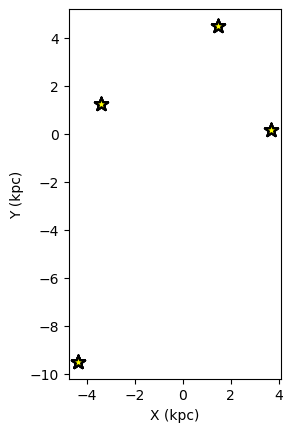

In [16]:
plt.style.use('default') #makes the background the default python

fig1, ax = plt.subplots() #sets up plot

### 1st star cluster
Drawing_colored_circle = plt.Circle(( xcm_singlecluster_1, ycm_singlecluster_1 ), 
                                    rmax_singlecluster_1, color="red", alpha=0.5) 
                                    
ax.add_artist( Drawing_colored_circle ) #draws circle
    
ax.scatter(x_singlecluster_1, y_singlecluster_1, facecolor="yellow", s=100, alpha=1, marker=r'*', 
           label="star cluster", edgecolor='black', linewidth=1.5)


### 2nd star cluster
Drawing_colored_circle = plt.Circle(( xcm_singlecluster_2, ycm_singlecluster_2 ), 
                                    rmax_singlecluster_2, color="red", alpha=0.5) 
                                    
ax.add_artist( Drawing_colored_circle ) #draws circle
    
ax.scatter(x_singlecluster_2, y_singlecluster_2, facecolor="yellow", s=100, alpha=1, marker=r'*', 
           label="star cluster", edgecolor='black', linewidth=1.5)


### 3rd star cluster
Drawing_colored_circle = plt.Circle(( xcm_singlecluster_3, ycm_singlecluster_3 ), 
                                    rmax_singlecluster_3, color="red", alpha=0.5) 
                                    
ax.add_artist( Drawing_colored_circle ) #draws circle
    
ax.scatter(x_singlecluster_3, y_singlecluster_3, facecolor="yellow", s=100, alpha=1, marker=r'*', 
           label="star cluster", edgecolor='black', linewidth=1.5)


### 4th star cluster
Drawing_colored_circle = plt.Circle(( xcm_singlecluster_4, ycm_singlecluster_4 ), 
                                    rmax_singlecluster_4, color="red", alpha=0.5) 
                                    
ax.add_artist( Drawing_colored_circle ) #draws circle
    
ax.scatter(x_singlecluster_4, y_singlecluster_4, facecolor="yellow", s=100, alpha=1, marker=r'*', 
           label="star cluster", edgecolor='black', linewidth=1.5)

ax.set_xlabel("X (kpc)") #sets x axis label
ax.set_ylabel("Y (kpc)") #sets y axis label

ax.set_aspect('equal') #sets apsect ratio to be equal

#ax.set_xlim([-3.42, -3.408]) #sets x limit at -15 to 15
#ax.set_ylim([1.25, 1.2625]) #sets y limit at -15 to 15

plt.show() #shows plot

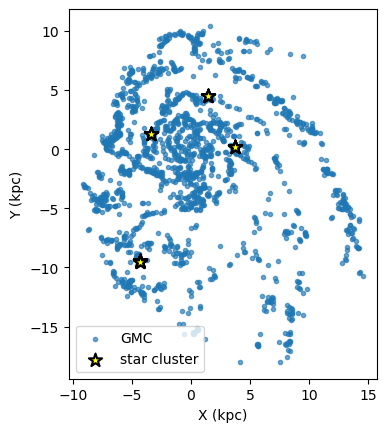

In [17]:
plt.style.use('default') #makes the background the default python

fig1, ax = plt.subplots() #sets up plot

### GMCs
ax.scatter(gxcm, gycm, alpha=.65, marker=r'.', #says to plot x vs y with the color blue and marker as .
           label="GMC") #calls it gmc in legend

### 1st star cluster
Drawing_colored_circle = plt.Circle(( xcm_singlecluster_1, ycm_singlecluster_1 ), 
                                    rmax_singlecluster_1, color="red", alpha=0.5) 
                                    
ax.add_artist( Drawing_colored_circle ) #draws circle
    
ax.scatter(x_singlecluster_1, y_singlecluster_1, facecolor="yellow", s=100, alpha=1, marker=r'*', 
           label="star cluster", edgecolor='black', linewidth=1.5)


### 2nd star cluster
Drawing_colored_circle = plt.Circle(( xcm_singlecluster_2, ycm_singlecluster_2 ), 
                                    rmax_singlecluster_2, color="red", alpha=0.5) 
                                    
ax.add_artist( Drawing_colored_circle ) #draws circle
    
ax.scatter(x_singlecluster_2, y_singlecluster_2, facecolor="yellow", s=100, alpha=1, marker=r'*', 
            edgecolor='black', linewidth=1.5)


### 3rd star cluster
Drawing_colored_circle = plt.Circle(( xcm_singlecluster_3, ycm_singlecluster_3 ), 
                                    rmax_singlecluster_3, color="red", alpha=0.5) 
                                    
ax.add_artist( Drawing_colored_circle ) #draws circle
    
ax.scatter(x_singlecluster_3, y_singlecluster_3, facecolor="yellow", s=100, alpha=1, marker=r'*', 
            edgecolor='black', linewidth=1.5)


### 4th star cluster
Drawing_colored_circle = plt.Circle(( xcm_singlecluster_4, ycm_singlecluster_4 ), 
                                    rmax_singlecluster_4, color="red", alpha=0.5) 
                                    
ax.add_artist( Drawing_colored_circle ) #draws circle
    
ax.scatter(x_singlecluster_4, y_singlecluster_4, facecolor="yellow", s=100, alpha=1, marker=r'*', 
            edgecolor='black', linewidth=1.5)


ax.set_xlabel("X (kpc)") #sets x axis label
ax.set_ylabel("Y (kpc)") #sets y axis label

ax.set_aspect('equal') #sets apsect ratio to be equal

#ax.set_xlim([-20, 20]) #sets x limit at -15 to 15
#ax.set_ylim([-20, 20]) #sets y limit at -15 to 15
ax.legend() #sets up legend

#plt.savefig('plot_x_vs_y.pdf') #saves plot as a pdf
#plt.savefig('plot_x_vs_y.png') #saves plot as a png

plt.show() #shows plot

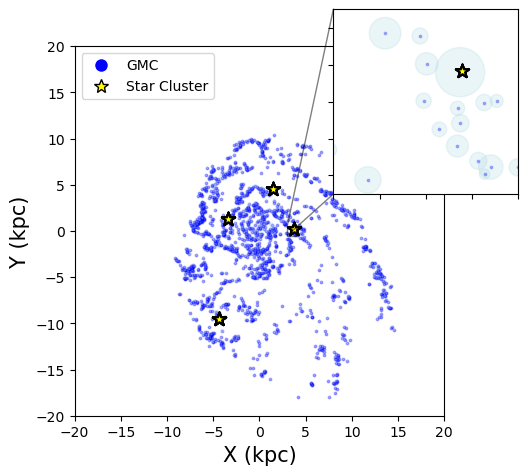

In [18]:
plt.style.use('default') #makes the background the default python

testcloud = np.arange(0, 1663, 1)  # First position in each array
fig1, ax = plt.subplots()

my_size = 15

### GMCs
for idx in range(len(testcloud)):
    testx = gxcm[testcloud[idx]]
    testy = gycm[testcloud[idx]]
    testr90 = gr90[testcloud[idx]]

    ax.scatter(testx, testy, color = 'blue', alpha=0.35, s = 12, marker='.', label="GMC")
    Drawing_colored_circle = plt.Circle((testx, testy), testr90, color="lightblue", alpha=0.25, label="GMC radius")
    ax.add_artist(Drawing_colored_circle)
    

### 1st star cluster
Drawing_colored_circle = plt.Circle(( xcm_singlecluster_1, ycm_singlecluster_1 ), 
                                    rmax_singlecluster_1, color="red", alpha=0.5) 
                                    
ax.add_artist( Drawing_colored_circle ) #draws circle
    
ax.scatter(x_singlecluster_1, y_singlecluster_1, facecolor="yellow", s=100, alpha=1, marker=r'*', 
           label="star cluster", edgecolor='black', linewidth=1.5)


### 2nd star cluster
Drawing_colored_circle = plt.Circle(( xcm_singlecluster_2, ycm_singlecluster_2 ), 
                                    rmax_singlecluster_2, color="red", alpha=0.5) 
                                    
ax.add_artist( Drawing_colored_circle ) #draws circle
    
ax.scatter(x_singlecluster_2, y_singlecluster_2, facecolor="yellow", s=100, alpha=1, marker=r'*', 
            edgecolor='black', linewidth=1.5)


### 3rd star cluster
Drawing_colored_circle = plt.Circle(( xcm_singlecluster_3, ycm_singlecluster_3 ), 
                                    rmax_singlecluster_3, color="red", alpha=0.5) 
                                    
ax.add_artist( Drawing_colored_circle ) #draws circle
    
ax.scatter(x_singlecluster_3, y_singlecluster_3, facecolor="yellow", s=100, alpha=1, marker=r'*', 
            edgecolor='black', linewidth=1.5)


### 4th star cluster
Drawing_colored_circle = plt.Circle(( xcm_singlecluster_4, ycm_singlecluster_4 ), 
                                    rmax_singlecluster_4, color="red", alpha=0.5) 
                                    
ax.add_artist( Drawing_colored_circle ) #draws circle
    
ax.scatter(x_singlecluster_4, y_singlecluster_4, facecolor="yellow", s=100, alpha=1, marker=r'*', 
            edgecolor='black', linewidth=1.5)



# Creating the inset axes
axins = ax.inset_axes([0.7, 0.6, 0.5, 0.5])  # [x0, y0, width, height]

for idx in range(len(testcloud)):
    testx = gxcm[testcloud[idx]]
    testy = gycm[testcloud[idx]]
    testr90 = gr90[testcloud[idx]]

    axins.scatter(testx, testy, c="blue", alpha=0.35, s = 12, marker='.', label="GMC")
    Drawing_colored_circle = plt.Circle((testx, testy), testr90, color="lightblue", alpha=0.25, label="GMC radius")
    axins.add_artist(Drawing_colored_circle)
    
### 1st cluster
Drawing_colored_circle = plt.Circle(( xcm_singlecluster_1, ycm_singlecluster_1 ), 
                                    rmax_singlecluster_1, color="red", alpha=0.5) 
                                    
axins.add_artist( Drawing_colored_circle ) #draws circle
    
axins.scatter(x_singlecluster_1, y_singlecluster_1, facecolor="yellow", s=100, alpha=1, marker=r'*', 
            label="star cluster", edgecolor='black', linewidth=1.5)
    
    
### 2nd cluster
Drawing_colored_circle = plt.Circle(( xcm_singlecluster_2, ycm_singlecluster_2 ), 
                                        rmax_singlecluster_2, color="red", alpha=0.5) 
                                    
axins.add_artist( Drawing_colored_circle ) #draws circle
    
axins.scatter(x_singlecluster_2, y_singlecluster_2, facecolor="yellow", s=100, alpha=1, marker=r'*', 
            edgecolor='black', linewidth=1.5)


### 3rd star cluster
Drawing_colored_circle = plt.Circle(( xcm_singlecluster_3, ycm_singlecluster_3 ), 
                                        rmax_singlecluster_3, color="red", alpha=0.5) 
                                    
axins.add_artist( Drawing_colored_circle ) #draws circle
    
axins.scatter(x_singlecluster_3, y_singlecluster_3, facecolor="yellow", s=100, alpha=1, marker=r'*', 
                edgecolor='black', linewidth=1.5)


### 4th star cluster
Drawing_colored_circle = plt.Circle(( xcm_singlecluster_4, ycm_singlecluster_4 ), 
                                    rmax_singlecluster_4, color="red", alpha=0.5) 
                                    
axins.add_artist( Drawing_colored_circle ) #draws circle
    
axins.scatter(x_singlecluster_4, y_singlecluster_4, facecolor="yellow", s=100, alpha=1, marker=r'*', 
            edgecolor='black', linewidth=1.5)
    
    
# Set limits for the inset axes
axins.set_xlim(3.0, 4.0)
axins.set_ylim(-.5, .5)
axins.set_xticklabels([])
axins.set_yticklabels([])

# Indicate the zoom region in the main plot
ax.indicate_inset_zoom(axins, edgecolor="black")


ax.set_xlabel("X (kpc)", fontsize = my_size) #sets x axis label
ax.set_ylabel("Y (kpc)", fontsize = my_size) #sets y axis label

ax.set_aspect('equal') #sets apsect ratio to be equal

ax.set_xlim([-20, 20]) #sets x limit at -15 to 15
ax.set_ylim([-20, 20]) #sets y limit at -15 to 15

# GMC legend entry (blue dot)
gmc_legend = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize = 10, label='GMC')

# Star Cluster legend entry (yellow star with black outline)
star_cluster_legend = plt.Line2D([0], [0], marker='*', color = 'w', markerfacecolor='yellow', markeredgecolor='black', markersize=10, label='Star Cluster')

# Create a legend with custom legend entries
ax.legend(handles=[gmc_legend, star_cluster_legend], fontsize = 10)

#plt.savefig('plot_x_vs_y.pdf') #saves plot as a pdf
#plt.savefig('plot_x_vs_y.png') #saves plot as a png

plt.show() #shows plot

### Get the ids of starclusters to match with future snapshots

In [19]:
print(ids_singlecluster_1)

[17980711 11255676 46222184 62065332 28249257 17674929 21827311 67788854]


In [20]:
#preserving ids code

master_ids = [17980711, 11255676, 46222184, 62065332, 28249257, 17674929, 21827311, 67788854]
ids = part_641['star']['id']
s641_loc = np.zeros(len(master_ids), dtype=int)  # Define s641_loc as a 1-dimensional numpy array

for i in range(len(master_ids)):
    input_id = master_ids[i]
    keep = np.where(input_id == ids)
    if keep[0].size > 0:  # Check if there's at least one matching element
        s641_loc[i] = keep[0][0]  # Assign the first matching index

print(ids[s641_loc])

[17980711 11255676 46222184 62065332 28249257 17674929 21827311 67788854]


In [21]:
#This is only for young stars at snapshot_641
xyoungstars    = x_641[si]
yyoungstars    = y_641[si]
zyoungstars    = z_641[si]
ageyoungstars  = age_641[si]*1000. #age in Myr
massyoungstars = mass_641[si]
idsyoungstars  = ids[s641_loc] #ids[si]

vxyoungstars_641   = vx_641[si]
vyyoungstars_641   = vy_641[si]
vzyoungstars_641   = vz_641[si]

print(idsyoungstars)

[17980711 11255676 46222184 62065332 28249257 17674929 21827311 67788854]


In [22]:
#Saving information for each of the 4 clusters found at step 640
x_singlecluster_1_641    = x_641[s641_loc] 
y_singlecluster_1_641    = y_641[s641_loc]
z_singlecluster_1_641    = z_641[s641_loc]
vx_singlecluster_1_641   = vxyoungstars_641[ind[0]]
vy_singlecluster_1_641   = vyyoungstars_641[ind[0]]
vz_singlecluster_1_641   = vzyoungstars_641[ind[0]]
age_singlecluster_1_641  = ageyoungstars[ind[0]]
mass_singlecluster_1_641 = massyoungstars[ind[0]]
ids_singlecluster_1_641  = ids[s641_loc]   
xcm_singlecluster_1_641  = xcm[0]
ycm_singlecluster_1_641  = ycm[0]
zcm_singlecluster_1_641  = zcm[0]
mtot_singlecluster_1_641 = mtot[0]
grpid_singlcluster_1_641 = grpid[0]
r90_singlecluster_1_641  = r90[0]
r50_singlecluster_1_641  = r50[0]
rmax_singlecluster_1_641 = rmax[0]

In [23]:
#preserving ids code

master_ids = [17980711, 11255676, 46222184, 62065332, 28249257, 17674929, 21827311, 67788854]
ids = part_642['star']['id']
s641_loc = np.zeros(len(master_ids), dtype=int)  # Define s641_loc as a 1-dimensional numpy array

for i in range(len(master_ids)):
    input_id = master_ids[i]
    keep = np.where(input_id == ids)
    if keep[0].size > 0:  # Check if there's at least one matching element
        s641_loc[i] = keep[0][0]  # Assign the first matching index

print(ids[s641_loc])

[17980711 11255676 46222184 62065332 28249257 17674929 21827311 67788854]


In [24]:
#This is only for young stars at snapshot_642
xyoungstars    = x_642[si]
yyoungstars    = y_642[si]
zyoungstars    = z_642[si]
ageyoungstars  = age_642[si]*1000. #age in Myr
massyoungstars = mass_642[si]
idsyoungstars  = ids[s641_loc] #ids[si]

vxyoungstars_642   = vx_642[si]
vyyoungstars_642   = vy_642[si]
vzyoungstars_642   = vz_642[si]

print(idsyoungstars)

[17980711 11255676 46222184 62065332 28249257 17674929 21827311 67788854]


In [25]:
#Saving information for each of the 4 clusters found at step 640
x_singlecluster_1_642    = x_642[s641_loc] 
y_singlecluster_1_642    = y_642[s641_loc]
z_singlecluster_1_642    = z_642[s641_loc]
vx_singlecluster_1_642   = vxyoungstars_642[ind[0]]
vy_singlecluster_1_642   = vyyoungstars_642[ind[0]]
vz_singlecluster_1_642   = vzyoungstars_642[ind[0]]
age_singlecluster_1_642  = ageyoungstars[ind[0]]
mass_singlecluster_1_642 = massyoungstars[ind[0]]
ids_singlecluster_1_642  = idsyoungstars   
xcm_singlecluster_1_642  = xcm[0]
ycm_singlecluster_1_642  = ycm[0]
zcm_singlecluster_1_642  = zcm[0]
mtot_singlecluster_1_642 = mtot[0]
grpid_singlcluster_1_642 = grpid[0]
r90_singlecluster_1_642  = r90[0]
r50_singlecluster_1_642  = r50[0]
rmax_singlecluster_1_642 = rmax[0]

In [26]:
#This is only for young stars at snapshot_644
xyoungstars    = x_644[si]
yyoungstars    = y_644[si]
zyoungstars    = z_644[si]
ageyoungstars  = age_644[si]*1000. #age in Myr
massyoungstars = mass_644[si]
idsyoungstars  = ids[s641_loc] #ids[si]

vxyoungstars_644   = vx_644[si]
vyyoungstars_644   = vy_644[si]
vzyoungstars_644   = vz_644[si]

print(idsyoungstars)

[17980711 11255676 46222184 62065332 28249257 17674929 21827311 67788854]


In [27]:
#Saving information for each of the 4 clusters found at step 640
x_singlecluster_1_644    = x_644[s641_loc] 
y_singlecluster_1_644    = y_644[s641_loc]
z_singlecluster_1_644    = z_644[s641_loc]
vx_singlecluster_1_644   = vxyoungstars_644[ind[0]]
vy_singlecluster_1_644   = vyyoungstars_644[ind[0]]
vz_singlecluster_1_644   = vzyoungstars_644[ind[0]]
age_singlecluster_1_644  = ageyoungstars[ind[0]]
mass_singlecluster_1_644 = massyoungstars[ind[0]]
ids_singlecluster_1_644  = idsyoungstars   
xcm_singlecluster_1_644  = xcm[0]
ycm_singlecluster_1_644  = ycm[0]
zcm_singlecluster_1_644  = zcm[0]
mtot_singlecluster_1_644 = mtot[0]
grpid_singlcluster_1_644 = grpid[0]
r90_singlecluster_1_644  = r90[0]
r50_singlecluster_1_644  = r50[0]
rmax_singlecluster_1_644 = rmax[0]

### Graphs

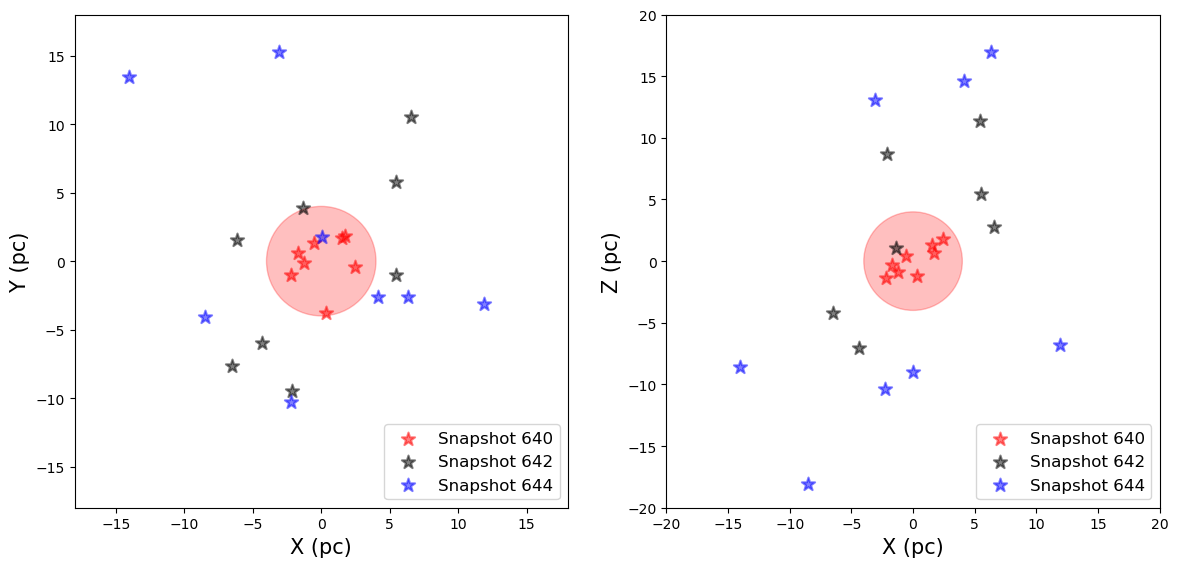

In [28]:
plt.style.use('default') #makes the background the default python

fig, (ax1, ax2) = plt.subplots(1, 2) #make a plot that is 1 row and 2 columns
fig.set_figheight(4*1.75)
fig.set_figwidth(8*1.75)

my_size = 15

Drawing_colored_circle = plt.Circle(( 0,0 ), 
                                    rmax_singlecluster_1*1000, color="red", alpha=0.25) 
                                    
ax1.add_artist( Drawing_colored_circle ) #draws circle
    
ax1.scatter((x_singlecluster_1 - xcm_singlecluster_1)*1000, (y_singlecluster_1 - ycm_singlecluster_1)*1000, facecolor="red", s=100, alpha=.5, marker=r'*', 
           label="Snapshot 640", edgecolor='red', linewidth=1.5)

xcm_1_641 = np.average(x_singlecluster_1_641, weights = mass_singlecluster_1_641)
ycm_1_641 = np.average(y_singlecluster_1_641, weights = mass_singlecluster_1_641)

#ax.scatter(x_singlecluster_1_641 - xcm_1_641, y_singlecluster_1_641 - ycm_1_641, facecolor="red", s=100, alpha=1, marker=r'*', 
           #label="star cluster", edgecolor='blue', linewidth=1.5)

xcm_1_642 = np.average(x_singlecluster_1_642, weights = mass_singlecluster_1_642)
ycm_1_642 = np.average(y_singlecluster_1_642, weights = mass_singlecluster_1_642)

ax1.scatter((x_singlecluster_1_642 - xcm_1_642)*1000, (y_singlecluster_1_642 - ycm_1_642)*1000, facecolor="black", s=100, alpha=.5, marker=r'*', 
           label="Snapshot 642", edgecolor='black', linewidth=1.5)

xcm_1_644 = np.average(x_singlecluster_1_644, weights = mass_singlecluster_1_644)
ycm_1_644 = np.average(y_singlecluster_1_644, weights = mass_singlecluster_1_644)

ax1.scatter((x_singlecluster_1_644 - xcm_1_644)*1000, (y_singlecluster_1_644 - ycm_1_644)*1000, facecolor="blue", s=100, alpha=.5, marker=r'*', 
           label="Snapshot 644", edgecolor='blue', linewidth=1.5)

ax1.set_xlabel("X (pc)", size = my_size) #sets x axis label
ax1.set_ylabel("Y (pc)", size = my_size) #sets y axis label
ax1.legend(loc = 'lower right', fontsize = 12)

ax1.set_aspect('equal') #sets apsect ratio to be equal

ax1.set_xlim(-.018*1000, .018*1000)
ax1.set_ylim(-.018*1000, .018*1000)



Drawing_colored_circle = plt.Circle(( 0,0 ), 
                                    rmax_singlecluster_1*1000, color="red", alpha=0.25) 
                                    
ax2.add_artist( Drawing_colored_circle ) #draws circle
    
ax2.scatter((x_singlecluster_1 - xcm_singlecluster_1)*1000, (z_singlecluster_1 - zcm_singlecluster_1)*1000, facecolor="red", s=100, alpha=.5, marker=r'*', 
           label="Snapshot 640", edgecolor='red', linewidth=1.5)

xcm_1_641 = np.average(x_singlecluster_1_641, weights = mass_singlecluster_1_641)
zcm_1_641 = np.average(z_singlecluster_1_641, weights = mass_singlecluster_1_641)

#ax.scatter(x_singlecluster_1_641 - xcm_1_641, y_singlecluster_1_641 - ycm_1_641, facecolor="red", s=100, alpha=1, marker=r'*', 
           #label="star cluster", edgecolor='blue', linewidth=1.5)

xcm_1_642 = np.average(x_singlecluster_1_642, weights = mass_singlecluster_1_642)
zcm_1_642 = np.average(z_singlecluster_1_642, weights = mass_singlecluster_1_642)

ax2.scatter((x_singlecluster_1_642 - xcm_1_642)*1000, (z_singlecluster_1_642 - zcm_1_642)*1000, facecolor="black", s=100, alpha=.5, marker=r'*', 
           label="Snapshot 642", edgecolor='black', linewidth=1.5)

xcm_1_644 = np.average(x_singlecluster_1_644, weights = mass_singlecluster_1_644)
zcm_1_644 = np.average(z_singlecluster_1_644, weights = mass_singlecluster_1_644)

ax2.scatter((x_singlecluster_1_644 - xcm_1_644)*1000, (z_singlecluster_1_644 - zcm_1_644)*1000, facecolor="blue", s=100, alpha=.5, marker=r'*', 
           label="Snapshot 644", edgecolor='blue', linewidth=1.5)

ax2.set_xlabel("X (pc)", size = my_size) #sets x axis label
ax2.set_ylabel("Z (pc)", size = my_size) #sets y axis label
ax2.legend(loc = 'lower right', fontsize = 12)

ax2.set_aspect('equal') #sets apsect ratio to be equal

ax2.set_xlim(-.02*1000, .02*1000)
ax2.set_ylim(-.02*1000, .02*1000)
#ax.set_xlim([-4.4, -4.3]) #sets x limit
#ax.set_ylim([-9.575, -9.475]) #sets y limit

#plt.savefig('X_vs_Y_X_vs_Z_m12i_singlecluster.pdf') #saves plot as a pdf
#plt.savefig('X_vs_Y_X_vs_Z_m12i_singlecluster.png') #saves plot as a png

plt.show() #shows plot

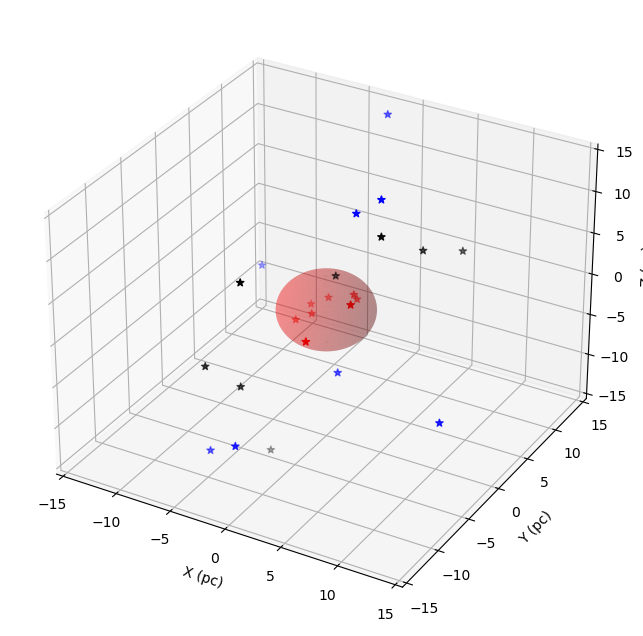

In [29]:
fig = plt.figure() # plot figure
fig.set_figheight(8) # sets plot height
fig.set_figwidth(8) # sets plot width
ax = fig.add_subplot(projection='3d') # sets up 3D projection
#ax.set_aspect('equal') # sets equal aspect

radius = rmax_singlecluster_1*1000  # Adjust the radius as needed
center = (0, 0, 0)

# Create a meshgrid of points for the sphere
phi = np.linspace(0, np.pi, 100)
theta = np.linspace(0, 2 * np.pi, 100)
phi, theta = np.meshgrid(phi, theta)

# Parametric equations for the sphere
x = center[0] + radius * np.sin(phi) * np.cos(theta)
y = center[1] + radius * np.sin(phi) * np.sin(theta)
z = center[2] + radius * np.cos(phi)

# Plot the sphere
ax.plot_surface(x, y, z, color='red', alpha=0.25)


posx_640 = (x_singlecluster_1 - xcm_singlecluster_1)*1000 
posy_640 = (y_singlecluster_1 - ycm_singlecluster_1)*1000
posz_640 = (z_singlecluster_1 - zcm_singlecluster_1)*1000

ax.scatter(posx_640, posy_640, posz_640, s= 30, color = 'red', marker='*') # graph x, y, and z with marker .


xcm_1_642 = np.average(x_singlecluster_1_642, weights = mass_singlecluster_1_642)
ycm_1_642 = np.average(y_singlecluster_1_642, weights = mass_singlecluster_1_642)
zcm_1_642 = np.average(z_singlecluster_1_642, weights = mass_singlecluster_1_642)

posx_642 = (x_singlecluster_1_642 - xcm_1_642)*1000 
posy_642 = (y_singlecluster_1_642 - ycm_1_642)*1000
posz_642 = (z_singlecluster_1_642 - zcm_1_642)*1000


ax.scatter(posx_642, posy_642, posz_642, s=30, color = 'black', marker='*') # graph x, y, and z with marker .

xcm_1_644 = np.average(x_singlecluster_1_644, weights = mass_singlecluster_1_644)
ycm_1_644 = np.average(y_singlecluster_1_644, weights = mass_singlecluster_1_644)
zcm_1_644 = np.average(z_singlecluster_1_644, weights = mass_singlecluster_1_644)


posx_644 = (x_singlecluster_1_644 - xcm_1_644)*1000 
posy_644 = (y_singlecluster_1_644 - ycm_1_644)*1000
posz_644 = (z_singlecluster_1_644 - zcm_1_644)*1000

ax.scatter(posx_644, posy_644, posz_644, s=30, color = 'blue', marker='*') # graph x, y, and z with marker .

ax.set_xlim([-15, 15]) #set x limit
ax.set_ylim([-15, 15]) #set y limit
ax.set_zlim([-15, 15]) #set z limit

ax.set_xlabel('X (pc)') # label x axis
ax.set_ylabel('Y (pc)') # label y axis
ax.set_zlabel('Z (pc)') # label z axis

#plt.savefig('stars_3d.pdf') #saves plot as a pdf
#plt.savefig('stars_3d.png') #saves plot as a png

plt.show() # show plot

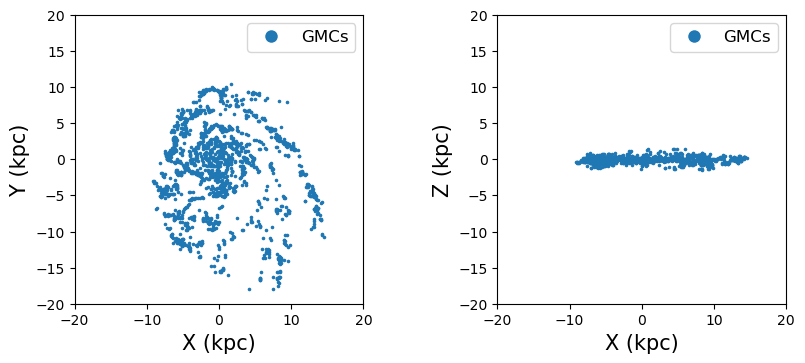

In [30]:
from matplotlib.lines import Line2D

fig, (ax1, ax2) = plt.subplots(1, 2) #make a plot that is 2 rows and 1 column
#fig.suptitle('X vs Y, X vs Z, Y vs Z of GMCs in Galaxy m12m') #title the plot
fig.set_figheight(3*1.25)
fig.set_figwidth(8*1.25)

my_size = 15

ax1.scatter(gxcm, gycm, s=10, label='GMCs', marker=r'.') #make first plot x vs y with marker .
#ax1.scatter(sposx, sposy, label='Stars', s=20, marker='.')
ax1.set_xlabel('X (kpc)', size = my_size) #label x axis
ax1.set_ylabel('Y (kpc)', size = my_size) #label y axis
ax1.set_aspect('equal') #sets aspect ratio to equal
custom_handles = [Line2D([0], [0], marker='o', color='w', label='GMCs', markerfacecolor='#1f77b4', markersize=10),]
# Create the legend with custom handles
legend = ax1.legend(handles=custom_handles, fontsize = 12)

ax1.set_xlim([-20, 20]) #sets x limit at -15 to 15
ax1.set_ylim([-20, 20]) #sets y limit at -15 to 15

ax2.scatter(gxcm, gzcm, s=10, label='GMCs', marker=r'.') #make second plot x vs z with marker .
ax2.set_xlabel('X (kpc)', size = my_size) #label x axis
ax2.set_ylabel('Z (kpc)', size = my_size) #label y axis
ax2.set_aspect('equal') #sets aspect ratio to equal
custom_handles = [Line2D([0], [0], marker='o', color='w', label='GMCs', markerfacecolor='#1f77b4', markersize=10),]
# Create the legend with custom handles
legend = ax2.legend(handles=custom_handles, fontsize = 12)

ax2.set_xlim([-20, 20]) #sets x limit at -15 to 15
ax2.set_ylim([-20, 20]) #sets y limit at -15 to 15

#plt.savefig('X_vs_Y_X_vs_Z_m12i.pdf') #saves plot as a pdf
#plt.savefig('X_vs_Y_X_vs_Z_m12i.png') #saves plot as a png

display = plt.show() #show plot

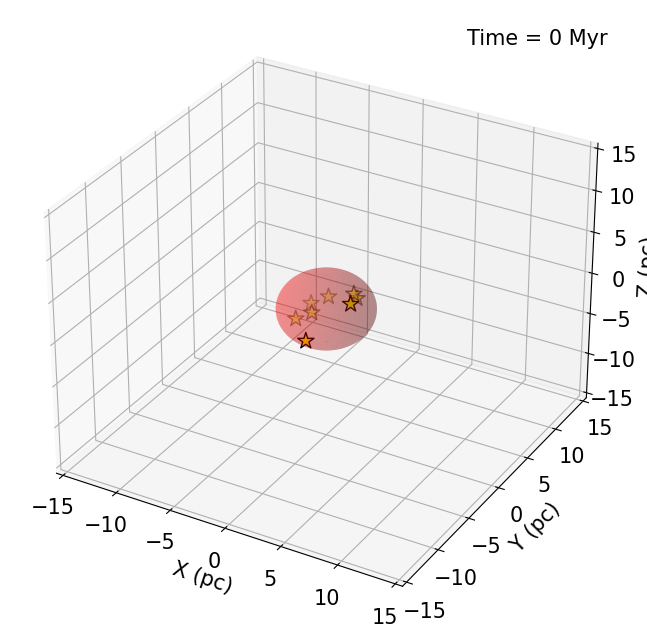

In [31]:
fig = plt.figure() # plot figure
fig.set_figheight(8) # sets plot height
fig.set_figwidth(8) # sets plot width
ax = fig.add_subplot(projection='3d') # sets up 3D projection
#ax.set_aspect('equal') # sets equal aspect

my_size = 15

radius = rmax_singlecluster_1*1000  # Adjust the radius as needed
center = (0, 0, 0)

# Create a meshgrid of points for the sphere
phi = np.linspace(0, np.pi, 100)
theta = np.linspace(0, 2 * np.pi, 100)
phi, theta = np.meshgrid(phi, theta)

# Parametric equations for the sphere
x = center[0] + radius * np.sin(phi) * np.cos(theta)
y = center[1] + radius * np.sin(phi) * np.sin(theta)
z = center[2] + radius * np.cos(phi)

# Plot the sphere
ax.plot_surface(x, y, z, color='red', alpha=0.25)


posx_640 = (x_singlecluster_1 - xcm_singlecluster_1)*1000 
posy_640 = (y_singlecluster_1 - ycm_singlecluster_1)*1000
posz_640 = (z_singlecluster_1 - zcm_singlecluster_1)*1000

ax.scatter(posx_640, posy_640, posz_640, s= 150, color = 'yellow', edgecolor = 'black', 
           label = 'Time = 0 Myr', marker='*') # graph x, y, and z with marker .

ax.set_xlim([-15, 15]) #set x limit
ax.set_ylim([-15, 15]) #set y limit
ax.set_zlim([-15, 15]) #set z limit

ax.set_xlabel('X (pc)', fontsize = my_size) # label x axis
ax.set_ylabel('Y (pc)', fontsize = my_size) # label y axis
ax.set_zlabel('Z (pc)', fontsize = my_size) # label z axis

ax.xaxis.set_tick_params(labelsize=my_size)
ax.yaxis.set_tick_params(labelsize=my_size)
ax.zaxis.set_tick_params(labelsize=my_size)

legend = ax.legend([ax.scatter([], [], [], s=0)], ['Time = 0 Myr'], fontsize=my_size) 
legend = plt.gca().get_legend()
if legend:
    legend.set_frame_on(False)

#plt.savefig('stars_3d.pdf') #saves plot as a pdf
plt.savefig('snap640.png') #saves plot as a png

plt.show() # show plot

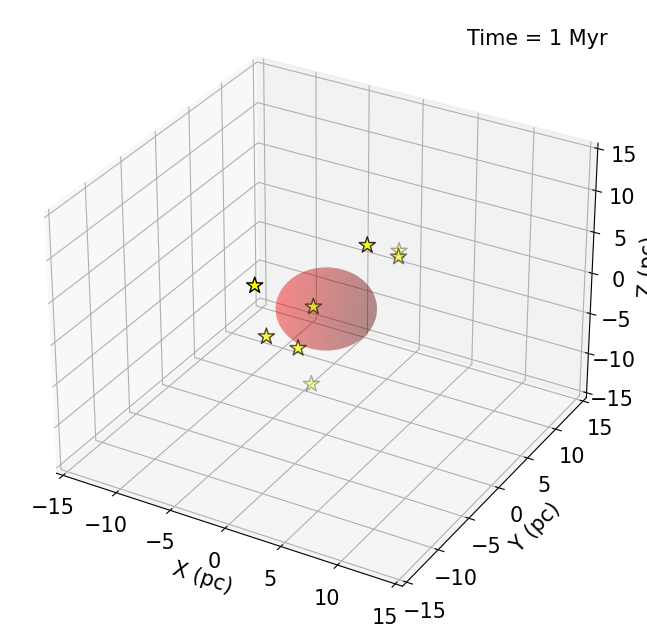

In [32]:
fig = plt.figure() # plot figure
fig.set_figheight(8) # sets plot height
fig.set_figwidth(8) # sets plot width
ax = fig.add_subplot(projection='3d') # sets up 3D projection
#ax.set_aspect('equal') # sets equal aspect

radius = rmax_singlecluster_1*1000  # Adjust the radius as needed
center = (0, 0, 0)

# Create a meshgrid of points for the sphere
phi = np.linspace(0, np.pi, 100)
theta = np.linspace(0, 2 * np.pi, 100)
phi, theta = np.meshgrid(phi, theta)

# Parametric equations for the sphere
x = center[0] + radius * np.sin(phi) * np.cos(theta)
y = center[1] + radius * np.sin(phi) * np.sin(theta)
z = center[2] + radius * np.cos(phi)

# Plot the sphere
ax.plot_surface(x, y, z, color='red', alpha=0.25)


xcm_1_641 = np.average(x_singlecluster_1_641, weights = mass_singlecluster_1_641)
ycm_1_641 = np.average(y_singlecluster_1_641, weights = mass_singlecluster_1_641)
zcm_1_641 = np.average(z_singlecluster_1_641, weights = mass_singlecluster_1_641)

posx_641 = (x_singlecluster_1_641 - xcm_1_641)*1000 
posy_641 = (y_singlecluster_1_641 - ycm_1_641)*1000
posz_641 = (z_singlecluster_1_641 - zcm_1_641)*1000

ax.scatter(posx_641, posy_641, posz_641, s=150, color = 'yellow', edgecolor = 'black',
           label = 'Time = 1 Myr', marker='*') # graph x, y, and z with marker .

ax.set_xlim([-15, 15]) #set x limit
ax.set_ylim([-15, 15]) #set y limit
ax.set_zlim([-15, 15]) #set z limit

ax.set_xlabel('X (pc)', fontsize = my_size) # label x axis
ax.set_ylabel('Y (pc)', fontsize = my_size) # label y axis
ax.set_zlabel('Z (pc)', fontsize = my_size) # label z axis

ax.xaxis.set_tick_params(labelsize=my_size)
ax.yaxis.set_tick_params(labelsize=my_size)
ax.zaxis.set_tick_params(labelsize=my_size)

legend = ax.legend([ax.scatter([], [], [], s=0)], ['Time = 1 Myr'], fontsize=my_size) 
legend = plt.gca().get_legend()
if legend:
    legend.set_frame_on(False)

#plt.savefig('stars_3d.pdf') #saves plot as a pdf
plt.savefig('snap641.png') #saves plot as a png

plt.show() # show plot

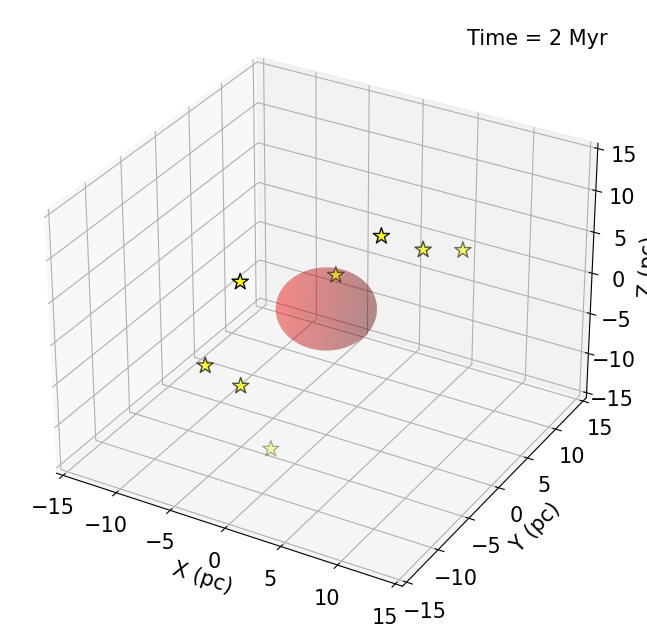

In [33]:
fig = plt.figure() # plot figure
fig.set_figheight(8) # sets plot height
fig.set_figwidth(8) # sets plot width
ax = fig.add_subplot(projection='3d') # sets up 3D projection
#ax.set_aspect('equal') # sets equal aspect

radius = rmax_singlecluster_1*1000  # Adjust the radius as needed
center = (0, 0, 0)

# Create a meshgrid of points for the sphere
phi = np.linspace(0, np.pi, 100)
theta = np.linspace(0, 2 * np.pi, 100)
phi, theta = np.meshgrid(phi, theta)

# Parametric equations for the sphere
x = center[0] + radius * np.sin(phi) * np.cos(theta)
y = center[1] + radius * np.sin(phi) * np.sin(theta)
z = center[2] + radius * np.cos(phi)

# Plot the sphere
ax.plot_surface(x, y, z, color='red', alpha=0.25)


xcm_1_642 = np.average(x_singlecluster_1_642, weights = mass_singlecluster_1_642)
ycm_1_642 = np.average(y_singlecluster_1_642, weights = mass_singlecluster_1_642)
zcm_1_642 = np.average(z_singlecluster_1_642, weights = mass_singlecluster_1_642)

posx_642 = (x_singlecluster_1_642 - xcm_1_642)*1000 
posy_642 = (y_singlecluster_1_642 - ycm_1_642)*1000
posz_642 = (z_singlecluster_1_642 - zcm_1_642)*1000

ax.scatter(posx_642, posy_642, posz_642, s=150, color = 'yellow', edgecolor = 'black',
           label = 'Time = 2 Myr', marker='*') # graph x, y, and z with marker .

ax.set_xlim([-15, 15]) #set x limit
ax.set_ylim([-15, 15]) #set y limit
ax.set_zlim([-15, 15]) #set z limit

ax.set_xlabel('X (pc)', fontsize = my_size) # label x axis
ax.set_ylabel('Y (pc)', fontsize = my_size) # label y axis
ax.set_zlabel('Z (pc)', fontsize = my_size) # label z axis

ax.xaxis.set_tick_params(labelsize=my_size)
ax.yaxis.set_tick_params(labelsize=my_size)
ax.zaxis.set_tick_params(labelsize=my_size)

legend = ax.legend([ax.scatter([], [], [], s=0)], ['Time = 2 Myr'], fontsize=my_size) 
legend = plt.gca().get_legend()
if legend:
    legend.set_frame_on(False)

#plt.savefig('stars_3d.pdf') #saves plot as a pdf
plt.savefig('snap642.png') #saves plot as a png

plt.show() # show plot

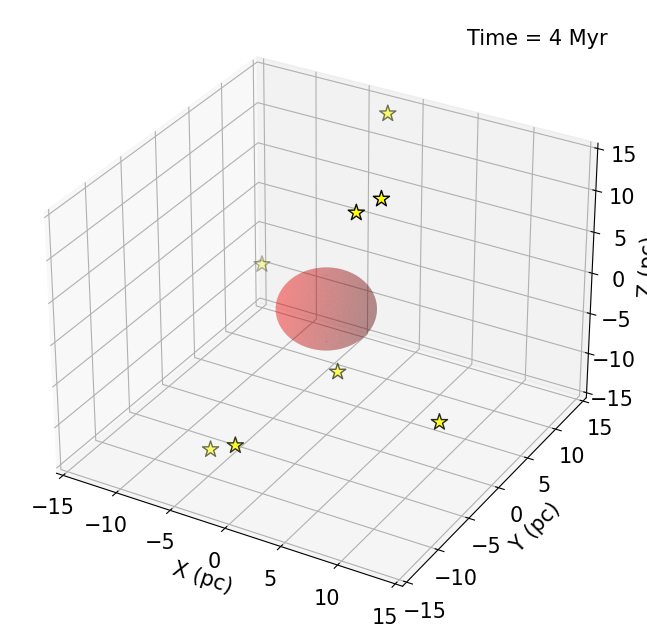

In [34]:
fig = plt.figure() # plot figure
fig.set_figheight(8) # sets plot height
fig.set_figwidth(8) # sets plot width
ax = fig.add_subplot(projection='3d') # sets up 3D projection
#ax.set_aspect('equal') # sets equal aspect

radius = rmax_singlecluster_1*1000  # Adjust the radius as needed
center = (0, 0, 0)

# Create a meshgrid of points for the sphere
phi = np.linspace(0, np.pi, 100)
theta = np.linspace(0, 2 * np.pi, 100)
phi, theta = np.meshgrid(phi, theta)

# Parametric equations for the sphere
x = center[0] + radius * np.sin(phi) * np.cos(theta)
y = center[1] + radius * np.sin(phi) * np.sin(theta)
z = center[2] + radius * np.cos(phi)

# Plot the sphere
ax.plot_surface(x, y, z, color='red', alpha=0.25)


xcm_1_644 = np.average(x_singlecluster_1_644, weights = mass_singlecluster_1_644)
ycm_1_644 = np.average(y_singlecluster_1_644, weights = mass_singlecluster_1_644)
zcm_1_644 = np.average(z_singlecluster_1_644, weights = mass_singlecluster_1_644)


posx_644 = (x_singlecluster_1_644 - xcm_1_644)*1000 
posy_644 = (y_singlecluster_1_644 - ycm_1_644)*1000
posz_644 = (z_singlecluster_1_644 - zcm_1_644)*1000

ax.scatter(posx_644, posy_644, posz_644, s=150, color = 'yellow', edgecolor = 'black',
           label = 'Time = 4 Myr', marker='*') # graph x, y, and z with marker .

ax.set_xlim([-15, 15]) #set x limit
ax.set_ylim([-15, 15]) #set y limit
ax.set_zlim([-15, 15]) #set z limit

ax.set_xlabel('X (pc)', fontsize = my_size) # label x axis
ax.set_ylabel('Y (pc)', fontsize = my_size) # label y axis
ax.set_zlabel('Z (pc)', fontsize = my_size) # label z axis

ax.xaxis.set_tick_params(labelsize=my_size)
ax.yaxis.set_tick_params(labelsize=my_size)
ax.zaxis.set_tick_params(labelsize=my_size)

legend = ax.legend([ax.scatter([], [], [], s=0)], ['Time = 4 Myr'], fontsize=my_size) 
legend = plt.gca().get_legend()
if legend:
    legend.set_frame_on(False)

#plt.savefig('stars_3d.pdf') #saves plot as a pdf
plt.savefig('snap644.png') #saves plot as a png

plt.show() # show plot

In [35]:
from PIL import Image
import glob  #use it if you want to read all of the certain file type in the directory
imgs=[]
for i in range(640, 643, 1): 
    imgs.append("snap"+str(i)+'.png')
    print("scanned the image identified with",i)  
    
imgs = glob.glob("*.png") #do this if you want to read all files ending with .png

frames = ['snap640.png', 'snap641.png', 'snap642.png']

frames.sort()

# Open the sorted frames using Pillow and create an animated GIF
images = [Image.open(frame) for frame in frames]

images[0].save('3D star cluster expanding.gif', save_all=True, append_images=images[1:], duration=1000, loop=0)

#for i in imgs:
    #new_frame = Image.open(i)
    #frames.append(new_frame)
    
#frames[0].save('3D star cluster expanding.gif', format='GIF',
    #append_images=frames[1:],
    #save_all=True,
    #duration=1000, loop=0)

scanned the image identified with 640
scanned the image identified with 641
scanned the image identified with 642


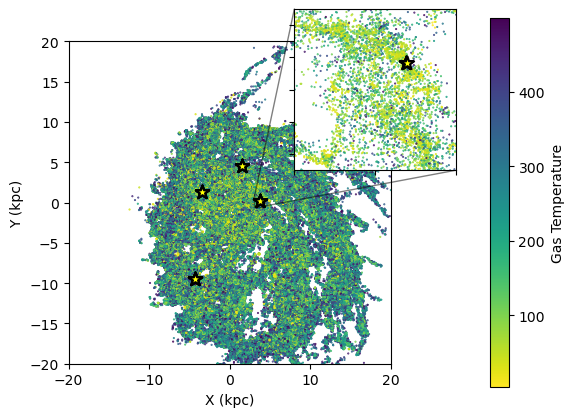

In [36]:
fig1, ax = plt.subplots()

# Gas particles
gposition = part640['gas'].prop('host.distance.principal')
gindex = np.where(part640['gas'].prop('temperature') < 500)
gas_x640 = gposition[gindex][:, 0]
gas_y640 = gposition[gindex][:, 1]
gas_z640 = gposition[gindex][:, 2]

# Reverse 'viridis' colormap for gas particles based on temperature
viridis_reversed = ListedColormap(plt.cm.viridis.colors[::-1])
gas_temperature = part640['gas'].prop('temperature')[gindex]
gas_scatter = ax.scatter(gas_x640, gas_y640, s=1, alpha=1, marker='.', label='gas particle', c=gas_temperature, cmap=viridis_reversed)

# Stars
sindex = np.where(part640['star'].prop('age') < 0.1)
sposition = part640['star'].prop('host.distance.principal')
posx = sposition[sindex][:, 0]
posy = sposition[sindex][:, 1]
#ax.scatter(posx, posy, s=1, marker='*', alpha=0.05, label='star', c='yellow')

# Use 'magma' colormap for stars based on age
star_age = part640['star'].prop('age')[sindex]
#star_scatter = ax.scatter(posx, posy, s=1, marker='*', alpha=0.05, label='star', c=star_age, cmap='magma')

### 1st star cluster
Drawing_colored_circle = plt.Circle(( xcm_singlecluster_1, ycm_singlecluster_1 ), 
                                    rmax_singlecluster_1, color="red", alpha=0.5) 
                                    
ax.add_artist( Drawing_colored_circle ) #draws circle
    
ax.scatter(x_singlecluster_1, y_singlecluster_1, facecolor="yellow", s=100, alpha=1, marker=r'*', 
           label="star cluster", edgecolor='black', linewidth=1.5)


### 2nd star cluster
Drawing_colored_circle = plt.Circle(( xcm_singlecluster_2, ycm_singlecluster_2 ), 
                                    rmax_singlecluster_2, color="red", alpha=0.5) 
                                    
ax.add_artist( Drawing_colored_circle ) #draws circle
    
ax.scatter(x_singlecluster_2, y_singlecluster_2, facecolor="yellow", s=100, alpha=1, marker=r'*', 
            edgecolor='black', linewidth=1.5)


### 3rd star cluster
Drawing_colored_circle = plt.Circle(( xcm_singlecluster_3, ycm_singlecluster_3 ), 
                                    rmax_singlecluster_3, color="red", alpha=0.5) 
                                    
ax.add_artist( Drawing_colored_circle ) #draws circle
    
ax.scatter(x_singlecluster_3, y_singlecluster_3, facecolor="yellow", s=100, alpha=1, marker=r'*', 
            edgecolor='black', linewidth=1.5)


### 4th star cluster
Drawing_colored_circle = plt.Circle(( xcm_singlecluster_4, ycm_singlecluster_4 ), 
                                    rmax_singlecluster_4, color="red", alpha=0.5) 
                                    
ax.add_artist( Drawing_colored_circle ) #draws circle
    
ax.scatter(x_singlecluster_4, y_singlecluster_4, facecolor="yellow", s=100, alpha=1, marker=r'*', 
            edgecolor='black', linewidth=1.5)

# Creating the inset axes
axins = ax.inset_axes([0.7, 0.6, 0.5, 0.5])  # [x0, y0, width, height]

axins.scatter(gas_x640, gas_y640, s=1, alpha=1, marker='.', label='gas particle', c=gas_temperature, cmap=viridis_reversed)
    
### 1st cluster
Drawing_colored_circle = plt.Circle(( xcm_singlecluster_1, ycm_singlecluster_1 ), 
                                    rmax_singlecluster_1, color="red", alpha=0.5) 
                                    
axins.add_artist( Drawing_colored_circle ) #draws circle
    
axins.scatter(x_singlecluster_1, y_singlecluster_1, facecolor="yellow", s=100, alpha=1, marker=r'*', 
            label="star cluster", edgecolor='black', linewidth=1.5)
    
    
### 2nd cluster
Drawing_colored_circle = plt.Circle(( xcm_singlecluster_2, ycm_singlecluster_2 ), 
                                        rmax_singlecluster_2, color="red", alpha=0.5) 
                                    
axins.add_artist( Drawing_colored_circle ) #draws circle
    
axins.scatter(x_singlecluster_2, y_singlecluster_2, facecolor="yellow", s=100, alpha=1, marker=r'*', 
            edgecolor='black', linewidth=1.5)


### 3rd star cluster
Drawing_colored_circle = plt.Circle(( xcm_singlecluster_3, ycm_singlecluster_3 ), 
                                        rmax_singlecluster_3, color="red", alpha=0.5) 
                                    
axins.add_artist( Drawing_colored_circle ) #draws circle
    
axins.scatter(x_singlecluster_3, y_singlecluster_3, facecolor="yellow", s=100, alpha=1, marker=r'*', 
                edgecolor='black', linewidth=1.5)


### 4th star cluster
Drawing_colored_circle = plt.Circle(( xcm_singlecluster_4, ycm_singlecluster_4 ), 
                                    rmax_singlecluster_4, color="red", alpha=0.5) 
                                    
axins.add_artist( Drawing_colored_circle ) #draws circle
    
axins.scatter(x_singlecluster_4, y_singlecluster_4, facecolor="yellow", s=100, alpha=1, marker=r'*', 
            edgecolor='black', linewidth=1.5)
    
    
# Set limits for the inset axes
axins.set_xlim(3.0, 4.0)
axins.set_ylim(-.5, .5)
axins.set_xticklabels([])
axins.set_yticklabels([])

# Indicate the zoom region in the main plot
ax.indicate_inset_zoom(axins, edgecolor="black")

ax.set_xlabel("X (kpc)")
ax.set_ylabel("Y (kpc)")

ax.set_aspect('equal')
ax.set_xlim([-20, 20])
ax.set_ylim([-20, 20])

# Add colorbar for the scatter plots
cbar_gas = plt.colorbar(gas_scatter, ax=ax, label='Gas Temperature', pad=0.2, orientation='vertical')
#cbar_star = plt.colorbar(star_scatter, ax=ax, label='Star Age')

# Adjust the location of colorbars to the left
#cbar_gas.ax.yaxis.set_label_coords(-1, 0.5)

plt.show()

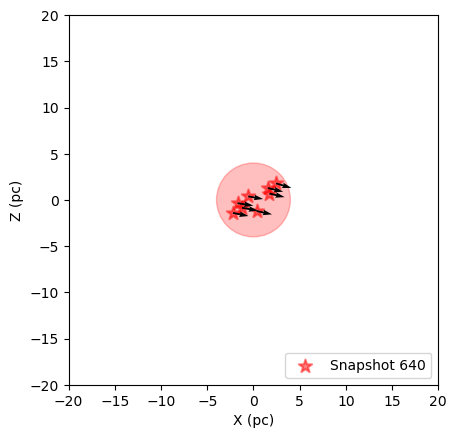

In [37]:
plt.style.use('default') #makes the background the default python

fig1, ax = plt.subplots() #sets up plot

my_size = 15

Drawing_colored_circle = plt.Circle(( 0,0 ), 
                                    rmax_singlecluster_1*1000, color="red", alpha=0.25) 
                                    
ax.add_artist( Drawing_colored_circle ) #draws circle
    
ax.scatter((x_singlecluster_1 - xcm_singlecluster_1)*1000, (z_singlecluster_1 - zcm_singlecluster_1)*1000, facecolor="red", s=100, alpha=.5, marker=r'*', 
           label="Snapshot 640", edgecolor='red', linewidth=1.5)

### Trying to add velocity vectors for snapshot 640
scale = .01  # You may need to adjust this based on the scale of your data
ax.quiver(
    (x_singlecluster_1 - xcm_singlecluster_1) * 1000, #x coordinate
    (z_singlecluster_1 - zcm_singlecluster_1) * 1000, #y coordinate
    vx_singlecluster_1 * scale, #x component of the vector
    vz_singlecluster_1 * scale, #z component of the vector
    color='black', angles='xy', scale_units='xy', scale=1, #color, angle of the arrows, and how big of arrows
    width=0.005  # You can adjust the width of the vectors
)

ax.set_xlabel("X (pc)") #sets x axis label
ax.set_ylabel("Z (pc)") #sets y axis label

ax.set_aspect('equal') #sets apsect ratio to be equal
ax.legend(loc = 'lower right')

ax.set_xlim(-.02*1000, .02*1000)
ax.set_ylim(-.02*1000, .02*1000)
#ax.set_xlim([-4.4, -4.3]) #sets x limit
#ax.set_ylim([-9.575, -9.475]) #sets y limit

plt.show() #shows plot

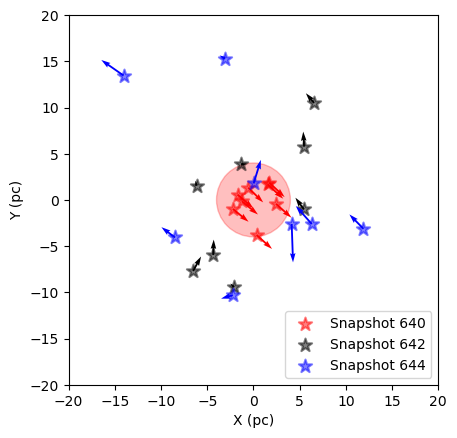

In [38]:
plt.style.use('default') #makes the background the default python

fig1, ax = plt.subplots() #sets up plot

my_size = 15

### Draw the original radius of the star cluster
Drawing_colored_circle = plt.Circle(( 0,0 ), 
                                    rmax_singlecluster_1*1000, color="red", alpha=0.25) 
                                    
ax.add_artist( Drawing_colored_circle ) #draws circle

### Draw the stars in the star cluster at snapshot 640
ax.scatter((x_singlecluster_1 - xcm_singlecluster_1)*1000, (y_singlecluster_1 - ycm_singlecluster_1)*1000, facecolor="red", s=100, alpha=.5, marker=r'*', 
           label="Snapshot 640", edgecolor='red', linewidth=1.5)

### Trying to add velocity vectors for snapshot 640
scale = .01  # You may need to adjust this based on the scale of your data
ax.quiver(
    (x_singlecluster_1 - xcm_singlecluster_1) * 1000, #x coordinate
    (y_singlecluster_1 - ycm_singlecluster_1) * 1000, #y coordinate
    vx_singlecluster_1 * scale, #x component of the vector
    vy_singlecluster_1 * scale, #y component of the vector
    color='red', angles='xy', scale_units='xy', scale=1, #color, angle of the arrows, and how big of arrows
    width=0.005  # You can adjust the width of the vectors
)

### Draw the stars in the star cluster at snapshot 641
xcm_1_641 = np.average(x_singlecluster_1_641, weights = mass_singlecluster_1_641)
ycm_1_641 = np.average(y_singlecluster_1_641, weights = mass_singlecluster_1_641)

#ax.scatter((x_singlecluster_1_641 - xcm_1_641)*10, (y_singlecluster_1_641 - ycm_1_641)*10, facecolor="blue", s=100, alpha=.5, marker=r'*', 
           #label="Snapshot 641", edgecolor='blue', linewidth=1.5)

### Trying to add velocity vectors for snapshot 641
#ax.quiver(
#    (x_singlecluster_1_641 - xcm_singlecluster_1_641) * 1000, #x coordinate
#    (y_singlecluster_1_641 - ycm_singlecluster_1_641) * 1000, #y coordinate
#    vx_singlecluster_1_641 * scale, #x component of the vector
#    vy_singlecluster_1_641 * scale, #y component of the vector
#    color='black', angles='xy', scale_units='xy', scale=1, #color, angle of the arrows, and how big of arrows
#    width=0.005  # You can adjust the width of the vectors
#)

### Draw the stars in the star cluster at snapshot 642
xcm_1_642 = np.average(x_singlecluster_1_642, weights = mass_singlecluster_1_642)
ycm_1_642 = np.average(y_singlecluster_1_642, weights = mass_singlecluster_1_642)

ax.scatter((x_singlecluster_1_642 - xcm_1_642)*1000, (y_singlecluster_1_642 - ycm_1_642)*1000, facecolor="black", s=100, alpha=.5, marker=r'*', 
           label="Snapshot 642", edgecolor='black', linewidth=1.5)

### Trying to add velocity vectors for snapshot 642
ax.quiver(
    (x_singlecluster_1_642 - xcm_1_642) * 1000,
    (y_singlecluster_1_642 - ycm_1_642) * 1000,
    vx_singlecluster_1_642 * scale,
    vy_singlecluster_1_642 * scale,
    color='black', angles='xy', scale_units='xy', scale=1,
    width=0.005
)

xcm_1_644 = np.average(x_singlecluster_1_644, weights = mass_singlecluster_1_644)
ycm_1_644 = np.average(y_singlecluster_1_644, weights = mass_singlecluster_1_644)

ax.scatter((x_singlecluster_1_644 - xcm_1_644)*1000, (y_singlecluster_1_644 - ycm_1_644)*1000, facecolor="blue", s=100, alpha=.5, marker=r'*', 
           label="Snapshot 644", edgecolor='blue', linewidth=1.5)

### Trying to add velocity vectors for snapshot 644
ax.quiver(
    (x_singlecluster_1_644 - xcm_1_644) * 1000, #x coordinate
    (y_singlecluster_1_644 - ycm_1_644) * 1000, #y coordinate
    vx_singlecluster_1_644 * scale, #x component of the vector
    vy_singlecluster_1_644 * scale, #y component of the vector
    color='blue', angles='xy', scale_units='xy', scale=1, #color, angle of the arrows, and how big of arrows
    width=0.005  # You can adjust the width of the vectors
)

ax.set_xlabel("X (pc)") #sets x axis label
ax.set_ylabel("Y (pc)") #sets y axis label

ax.set_aspect('equal') #sets apsect ratio to be equal
ax.legend(loc = 'lower right')

ax.set_xlim(-.02*1000, .02*1000)
ax.set_ylim(-.02*1000, .02*1000)
#ax.set_xlim([-4.4, -4.3]) #sets x limit
#ax.set_ylim([-9.575, -9.475]) #sets y limit

plt.show() #shows plot

In [39]:
print(vx_singlecluster_1)
print(vx_singlecluster_1_642)
print(vx_singlecluster_1_644)

[166.89093 161.77267 168.1184  164.87056 172.73532 169.3495  171.02928
 167.02138]
[-12.164202 -38.78392    5.21481   85.7359    -9.267574 -88.3665
 -92.58616   61.055153]
[ -60.162903   77.991684 -172.43503  -152.41391    14.3268   -240.6976
 -147.24747  -126.46977 ]


In [40]:
print(math.sqrt((vx_singlecluster_1[0])**2 + (vy_singlecluster_1[0])**2 + (vz_singlecluster_1[0])**2))

229.4249648967146


In [41]:
print(math.sqrt((vx_singlecluster_1_642[0])**2 + (vy_singlecluster_1_642[0])**2 + (vz_singlecluster_1_642[0])**2))

136.62931641718598


In [42]:
print(math.sqrt((vx_singlecluster_1_644[0])**2 + (vy_singlecluster_1_644[0])**2 + (vz_singlecluster_1_644[0])**2))

342.9460268740039


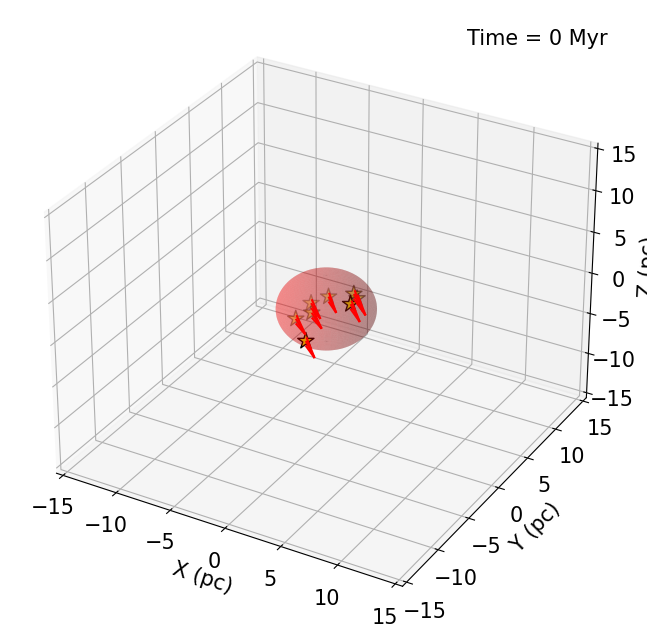

In [43]:
fig = plt.figure() # plot figure
fig.set_figheight(8) # sets plot height
fig.set_figwidth(8) # sets plot width
ax = fig.add_subplot(projection='3d') # sets up 3D projection
#ax.set_aspect('equal') # sets equal aspect

my_size = 15

radius = rmax_singlecluster_1*1000  # Adjust the radius as needed
center = (0, 0, 0)

# Create a meshgrid of points for the sphere
phi = np.linspace(0, np.pi, 100)
theta = np.linspace(0, 2 * np.pi, 100)
phi, theta = np.meshgrid(phi, theta)

# Parametric equations for the sphere
x = center[0] + radius * np.sin(phi) * np.cos(theta)
y = center[1] + radius * np.sin(phi) * np.sin(theta)
z = center[2] + radius * np.cos(phi)

# Plot the sphere
ax.plot_surface(x, y, z, color='red', alpha=0.25)


posx_640 = (x_singlecluster_1 - xcm_singlecluster_1)*1000 
posy_640 = (y_singlecluster_1 - ycm_singlecluster_1)*1000
posz_640 = (z_singlecluster_1 - zcm_singlecluster_1)*1000

ax.scatter(posx_640, posy_640, posz_640, s= 150, color = 'yellow', edgecolor = 'black', 
           label = 'Time = 0 Myr', marker='*') # graph x, y, and z with marker .

ax.quiver(
    (x_singlecluster_1 - xcm_singlecluster_1) * 1000, #x coordinate
    (y_singlecluster_1 - ycm_singlecluster_1) * 1000, #y coordinate
    (z_singlecluster_1 - zcm_singlecluster_1) * 1000, #z coordinate
    vx_singlecluster_1 * scale, #x component of the vector
    vy_singlecluster_1 * scale, #y component of the vector
    vz_singlecluster_1 * scale, #z component of the vector
    color='red',  # color of the arrows
    arrow_length_ratio=1,  # You can adjust the length of the arrows
    linewidth=1.5  # You can adjust the width of the vectors
)

ax.set_xlim([-15, 15]) #set x limit
ax.set_ylim([-15, 15]) #set y limit
ax.set_zlim([-15, 15]) #set z limit

ax.set_xlabel('X (pc)', fontsize = my_size) # label x axis
ax.set_ylabel('Y (pc)', fontsize = my_size) # label y axis
ax.set_zlabel('Z (pc)', fontsize = my_size) # label z axis

ax.xaxis.set_tick_params(labelsize=my_size)
ax.yaxis.set_tick_params(labelsize=my_size)
ax.zaxis.set_tick_params(labelsize=my_size)

legend = ax.legend([ax.scatter([], [], [], s=0)], ['Time = 0 Myr'], fontsize=my_size) 
legend = plt.gca().get_legend()
if legend:
    legend.set_frame_on(False)

#plt.savefig('stars_3d.pdf') #saves plot as a pdf
#plt.savefig('snap640.png') #saves plot as a png

plt.show() # show plot

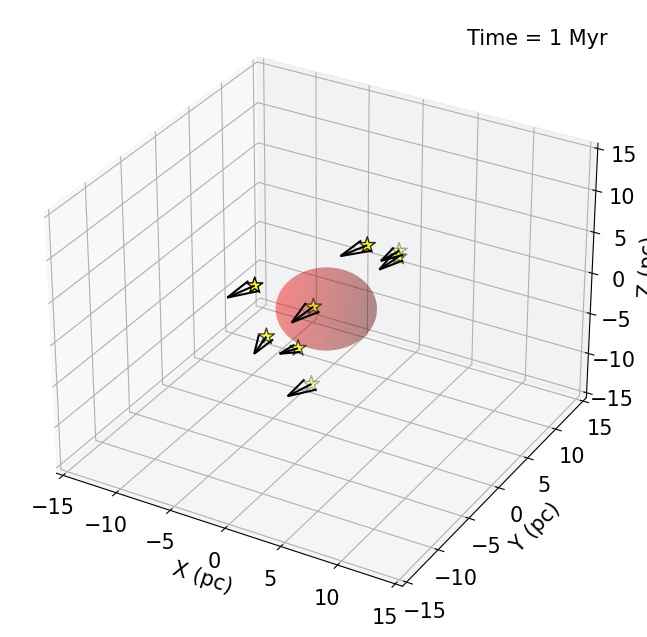

In [44]:
fig = plt.figure() # plot figure
fig.set_figheight(8) # sets plot height
fig.set_figwidth(8) # sets plot width
ax = fig.add_subplot(projection='3d') # sets up 3D projection
#ax.set_aspect('equal') # sets equal aspect

radius = rmax_singlecluster_1*1000  # Adjust the radius as needed
center = (0, 0, 0)

# Create a meshgrid of points for the sphere
phi = np.linspace(0, np.pi, 100)
theta = np.linspace(0, 2 * np.pi, 100)
phi, theta = np.meshgrid(phi, theta)

# Parametric equations for the sphere
x = center[0] + radius * np.sin(phi) * np.cos(theta)
y = center[1] + radius * np.sin(phi) * np.sin(theta)
z = center[2] + radius * np.cos(phi)

# Plot the sphere
ax.plot_surface(x, y, z, color='red', alpha=0.25)


xcm_1_641 = np.average(x_singlecluster_1_641, weights = mass_singlecluster_1_641)
ycm_1_641 = np.average(y_singlecluster_1_641, weights = mass_singlecluster_1_641)
zcm_1_641 = np.average(z_singlecluster_1_641, weights = mass_singlecluster_1_641)

posx_641 = (x_singlecluster_1_641 - xcm_1_641)*1000 
posy_641 = (y_singlecluster_1_641 - ycm_1_641)*1000
posz_641 = (z_singlecluster_1_641 - zcm_1_641)*1000

ax.scatter(posx_641, posy_641, posz_641, s=150, color = 'yellow', edgecolor = 'black',
           label = 'Time = 1 Myr', marker='*') # graph x, y, and z with marker .

ax.quiver(
    (x_singlecluster_1_641 - xcm_1_641) * 1000, #x coordinate
    (y_singlecluster_1_641 - ycm_1_641) * 1000, #y coordinate
    (z_singlecluster_1_641 - zcm_1_641) * 1000, #z coordinate
    vx_singlecluster_1_641 * scale, #x component of the vector
    vy_singlecluster_1_641 * scale, #y component of the vector
    vz_singlecluster_1_641 * scale, #z component of the vector
    color='black', #color of the arrows
    arrow_length_ratio=1,  # You can adjust the length of the arrows
    linewidth=1.5  # You can adjust the width of the vectors
)

ax.set_xlim([-15, 15]) #set x limit
ax.set_ylim([-15, 15]) #set y limit
ax.set_zlim([-15, 15]) #set z limit

ax.set_xlabel('X (pc)', fontsize = my_size) # label x axis
ax.set_ylabel('Y (pc)', fontsize = my_size) # label y axis
ax.set_zlabel('Z (pc)', fontsize = my_size) # label z axis

ax.xaxis.set_tick_params(labelsize=my_size)
ax.yaxis.set_tick_params(labelsize=my_size)
ax.zaxis.set_tick_params(labelsize=my_size)

legend = ax.legend([ax.scatter([], [], [], s=0)], ['Time = 1 Myr'], fontsize=my_size) 
legend = plt.gca().get_legend()
if legend:
    legend.set_frame_on(False)

#plt.savefig('stars_3d.pdf') #saves plot as a pdf
#plt.savefig('snap641.png') #saves plot as a png

plt.show() # show plot

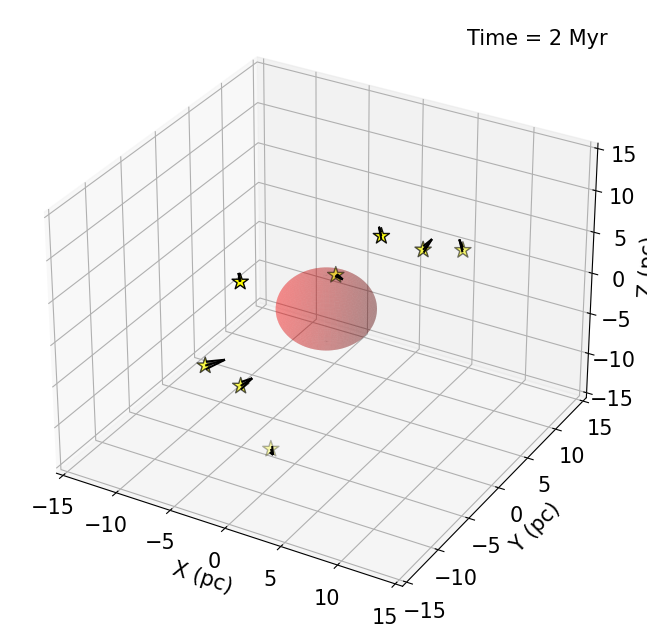

In [45]:
fig = plt.figure() # plot figure
fig.set_figheight(8) # sets plot height
fig.set_figwidth(8) # sets plot width
ax = fig.add_subplot(projection='3d') # sets up 3D projection
#ax.set_aspect('equal') # sets equal aspect

radius = rmax_singlecluster_1*1000  # Adjust the radius as needed
center = (0, 0, 0)

# Create a meshgrid of points for the sphere
phi = np.linspace(0, np.pi, 100)
theta = np.linspace(0, 2 * np.pi, 100)
phi, theta = np.meshgrid(phi, theta)

# Parametric equations for the sphere
x = center[0] + radius * np.sin(phi) * np.cos(theta)
y = center[1] + radius * np.sin(phi) * np.sin(theta)
z = center[2] + radius * np.cos(phi)

# Plot the sphere
ax.plot_surface(x, y, z, color='red', alpha=0.25)


xcm_1_642 = np.average(x_singlecluster_1_642, weights = mass_singlecluster_1_642)
ycm_1_642 = np.average(y_singlecluster_1_642, weights = mass_singlecluster_1_642)
zcm_1_642 = np.average(z_singlecluster_1_642, weights = mass_singlecluster_1_642)

posx_642 = (x_singlecluster_1_642 - xcm_1_642)*1000 
posy_642 = (y_singlecluster_1_642 - ycm_1_642)*1000
posz_642 = (z_singlecluster_1_642 - zcm_1_642)*1000

ax.scatter(posx_642, posy_642, posz_642, s=150, color = 'yellow', edgecolor = 'black',
           label = 'Time = 2 Myr', marker='*') # graph x, y, and z with marker .

ax.quiver(
    (x_singlecluster_1_642 - xcm_1_642) * 1000,
    (y_singlecluster_1_642 - ycm_1_642) * 1000,
    (z_singlecluster_1_642 - zcm_1_642) * 1000,
    vx_singlecluster_1_642 * scale,
    vy_singlecluster_1_642 * scale,
    vz_singlecluster_1_642 * scale,
    color='black', #color of the arrows
    arrow_length_ratio=1,  # You can adjust the length of the arrows
    linewidth=1.5  # You can adjust the width of the vectors
)

ax.set_xlim([-15, 15]) #set x limit
ax.set_ylim([-15, 15]) #set y limit
ax.set_zlim([-15, 15]) #set z limit

ax.set_xlabel('X (pc)', fontsize = my_size) # label x axis
ax.set_ylabel('Y (pc)', fontsize = my_size) # label y axis
ax.set_zlabel('Z (pc)', fontsize = my_size) # label z axis

ax.xaxis.set_tick_params(labelsize=my_size)
ax.yaxis.set_tick_params(labelsize=my_size)
ax.zaxis.set_tick_params(labelsize=my_size)

legend = ax.legend([ax.scatter([], [], [], s=0)], ['Time = 2 Myr'], fontsize=my_size) 
legend = plt.gca().get_legend()
if legend:
    legend.set_frame_on(False)

#plt.savefig('stars_3d.pdf') #saves plot as a pdf
#plt.savefig('snap642.png') #saves plot as a png

plt.show() # show plot

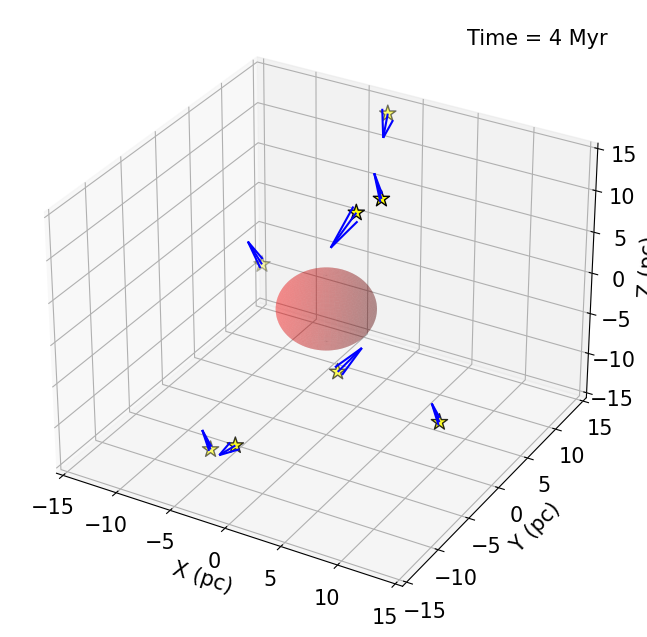

In [46]:
fig = plt.figure() # plot figure
fig.set_figheight(8) # sets plot height
fig.set_figwidth(8) # sets plot width
ax = fig.add_subplot(projection='3d') # sets up 3D projection
#ax.set_aspect('equal') # sets equal aspect

radius = rmax_singlecluster_1*1000  # Adjust the radius as needed
center = (0, 0, 0)

# Create a meshgrid of points for the sphere
phi = np.linspace(0, np.pi, 100)
theta = np.linspace(0, 2 * np.pi, 100)
phi, theta = np.meshgrid(phi, theta)

# Parametric equations for the sphere
x = center[0] + radius * np.sin(phi) * np.cos(theta)
y = center[1] + radius * np.sin(phi) * np.sin(theta)
z = center[2] + radius * np.cos(phi)

# Plot the sphere
ax.plot_surface(x, y, z, color='red', alpha=0.25)


xcm_1_644 = np.average(x_singlecluster_1_644, weights = mass_singlecluster_1_644)
ycm_1_644 = np.average(y_singlecluster_1_644, weights = mass_singlecluster_1_644)
zcm_1_644 = np.average(z_singlecluster_1_644, weights = mass_singlecluster_1_644)

posx_644 = (x_singlecluster_1_644 - xcm_1_644)*1000 
posy_644 = (y_singlecluster_1_644 - ycm_1_644)*1000
posz_644 = (z_singlecluster_1_644 - zcm_1_644)*1000

ax.scatter(posx_644, posy_644, posz_644, s=150, color = 'yellow', edgecolor = 'black',
           label = 'Time = 4 Myr', marker='*') # graph x, y, and z with marker .

ax.quiver(
    (x_singlecluster_1_644 - xcm_1_644) * 1000,
    (y_singlecluster_1_644 - ycm_1_644) * 1000,
    (z_singlecluster_1_644 - zcm_1_644) * 1000,
    vx_singlecluster_1_644 * scale,
    vy_singlecluster_1_644 * scale,
    vz_singlecluster_1_644 * scale,
    color='blue', #color of the arrows
    arrow_length_ratio=1,  # You can adjust the length of the arrows
    linewidth=1.5  # You can adjust the width of the vectors
)

ax.set_xlim([-15, 15]) #set x limit
ax.set_ylim([-15, 15]) #set y limit
ax.set_zlim([-15, 15]) #set z limit

ax.set_xlabel('X (pc)', fontsize = my_size) # label x axis
ax.set_ylabel('Y (pc)', fontsize = my_size) # label y axis
ax.set_zlabel('Z (pc)', fontsize = my_size) # label z axis

ax.xaxis.set_tick_params(labelsize=my_size)
ax.yaxis.set_tick_params(labelsize=my_size)
ax.zaxis.set_tick_params(labelsize=my_size)

legend = ax.legend([ax.scatter([], [], [], s=0)], ['Time = 4 Myr'], fontsize=my_size) 
legend = plt.gca().get_legend()
if legend:
    legend.set_frame_on(False)

#plt.savefig('stars_3d.pdf') #saves plot as a pdf
#plt.savefig('snap642.png') #saves plot as a png

plt.show() # show plot

MovieWriter imagemagick unavailable; using Pillow instead.


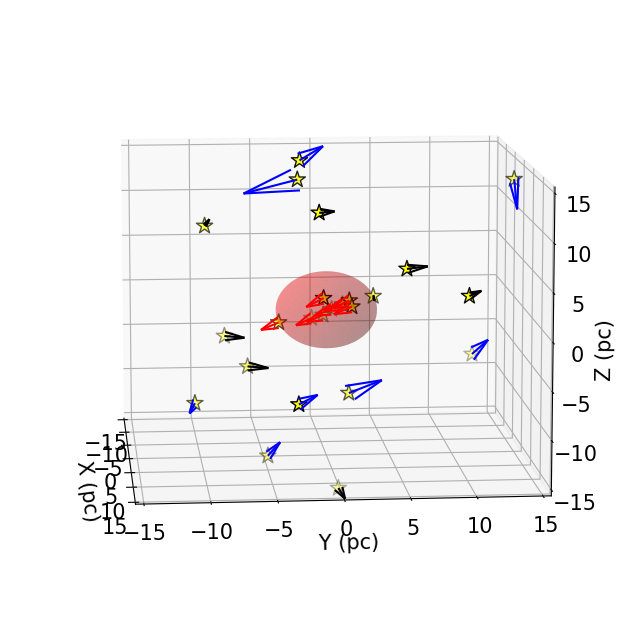

In [47]:
fig = plt.figure() # plot figure
fig.set_figheight(8) # sets plot height
fig.set_figwidth(8) # sets plot width
ax = fig.add_subplot(projection='3d') # sets up 3D projection
#ax.set_aspect('equal') # sets equal aspect

my_size = 15

radius = rmax_singlecluster_1*1000  # Adjust the radius as needed
center = (0, 0, 0)

# Create a meshgrid of points for the sphere
phi = np.linspace(0, np.pi, 100)
theta = np.linspace(0, 2 * np.pi, 100)
phi, theta = np.meshgrid(phi, theta)

# Create a function to update the plot for each frame of the animation
def update(frame):
    ax.view_init(elev=10, azim=frame)

# Parametric equations for the sphere
x = center[0] + radius * np.sin(phi) * np.cos(theta)
y = center[1] + radius * np.sin(phi) * np.sin(theta)
z = center[2] + radius * np.cos(phi)

# Plot the sphere
ax.plot_surface(x, y, z, color='red', alpha=0.25)


posx_640 = (x_singlecluster_1 - xcm_singlecluster_1)*1000 
posy_640 = (y_singlecluster_1 - ycm_singlecluster_1)*1000
posz_640 = (z_singlecluster_1 - zcm_singlecluster_1)*1000

ax.scatter(posx_640, posy_640, posz_640, s= 150, color = 'yellow', edgecolor = 'black', 
           label = 'Time = 0 Myr', marker='*') # graph x, y, and z with marker .

ax.quiver(
    (x_singlecluster_1 - xcm_singlecluster_1) * 1000, #x coordinate
    (y_singlecluster_1 - ycm_singlecluster_1) * 1000, #y coordinate
    (z_singlecluster_1 - zcm_singlecluster_1) * 1000, #z coordinate
    vx_singlecluster_1 * scale, #x component of the vector
    vy_singlecluster_1 * scale, #y component of the vector
    vz_singlecluster_1 * scale, #z component of the vector
    color='red',  # color of the arrows
    arrow_length_ratio=1,  # You can adjust the length of the arrows
    linewidth=1.5  # You can adjust the width of the vectors
)

xcm_1_642 = np.average(x_singlecluster_1_642, weights = mass_singlecluster_1_642)
ycm_1_642 = np.average(y_singlecluster_1_642, weights = mass_singlecluster_1_642)
zcm_1_642 = np.average(z_singlecluster_1_642, weights = mass_singlecluster_1_642)

posx_642 = (x_singlecluster_1_642 - xcm_1_642)*1000 
posy_642 = (y_singlecluster_1_642 - ycm_1_642)*1000
posz_642 = (z_singlecluster_1_642 - zcm_1_642)*1000

ax.scatter(posx_642, posy_642, posz_642, s=150, color = 'yellow', edgecolor = 'black',
           label = 'Time = 2 Myr', marker='*') # graph x, y, and z with marker .

ax.quiver(
    (x_singlecluster_1_642 - xcm_1_642) * 1000,
    (y_singlecluster_1_642 - ycm_1_642) * 1000,
    (z_singlecluster_1_642 - zcm_1_642) * 1000,
    vx_singlecluster_1_642 * scale,
    vy_singlecluster_1_642 * scale,
    vz_singlecluster_1_642 * scale,
    color='black', #color of the arrows
    arrow_length_ratio=1,  # You can adjust the length of the arrows
    linewidth=1.5  # You can adjust the width of the vectors
)

xcm_1_644 = np.average(x_singlecluster_1_644, weights = mass_singlecluster_1_644)
ycm_1_644 = np.average(y_singlecluster_1_644, weights = mass_singlecluster_1_644)
zcm_1_644 = np.average(z_singlecluster_1_644, weights = mass_singlecluster_1_644)

posx_644 = (x_singlecluster_1_644 - xcm_1_644)*1000 
posy_644 = (y_singlecluster_1_644 - ycm_1_644)*1000
posz_644 = (z_singlecluster_1_644 - zcm_1_644)*1000

ax.scatter(posx_644, posy_644, posz_644, s=150, color = 'yellow', edgecolor = 'black',
           label = 'Time = 4 Myr', marker='*') # graph x, y, and z with marker .

ax.quiver(
    (x_singlecluster_1_644 - xcm_1_644) * 1000,
    (y_singlecluster_1_644 - ycm_1_644) * 1000,
    (z_singlecluster_1_644 - zcm_1_644) * 1000,
    vx_singlecluster_1_644 * scale,
    vy_singlecluster_1_644 * scale,
    vz_singlecluster_1_644 * scale,
    color='blue', #color of the arrows
    arrow_length_ratio=1,  # You can adjust the length of the arrows
    linewidth=1.5  # You can adjust the width of the vectors
)

ax.set_xlim([-15, 15]) #set x limit
ax.set_ylim([-15, 15]) #set y limit
ax.set_zlim([-15, 15]) #set z limit

ax.set_xlabel('X (pc)', fontsize = my_size) # label x axis
ax.set_ylabel('Y (pc)', fontsize = my_size) # label y axis
ax.set_zlabel('Z (pc)', fontsize = my_size) # label z axis

ax.xaxis.set_tick_params(labelsize=my_size)
ax.yaxis.set_tick_params(labelsize=my_size)
ax.zaxis.set_tick_params(labelsize=my_size)

#legend = ax.legend([ax.scatter([], [], [], s=0)], ['Time = 0 Myr'], fontsize=my_size) 
#legend = plt.gca().get_legend()
#if legend:
    #legend.set_frame_on(False)
    
# Create the animation
ani = FuncAnimation(fig, update, frames=np.arange(0, 360, 5), interval=20000)

# Save the animation as a GIF
ani.save('3d_animation.gif', writer='imagemagick', fps=30)

#plt.savefig('stars_3d.pdf') #saves plot as a pdf
#plt.savefig('snap640.png') #saves plot as a png

plt.show() # show plot

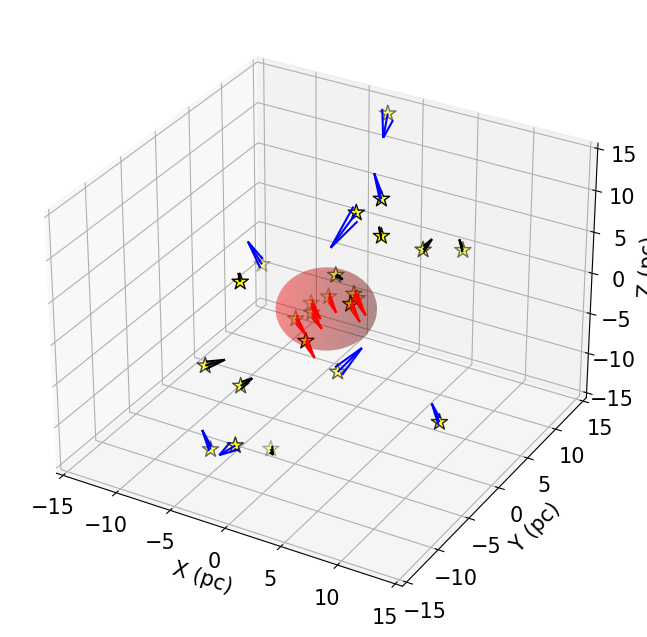

In [48]:
fig = plt.figure() # plot figure
fig.set_figheight(8) # sets plot height
fig.set_figwidth(8) # sets plot width
ax = fig.add_subplot(projection='3d') # sets up 3D projection
#ax.set_aspect('equal') # sets equal aspect

my_size = 15

radius = rmax_singlecluster_1*1000  # Adjust the radius as needed
center = (0, 0, 0)

# Create a meshgrid of points for the sphere
phi = np.linspace(0, np.pi, 100)
theta = np.linspace(0, 2 * np.pi, 100)
phi, theta = np.meshgrid(phi, theta)

# Create a function to update the plot for each frame of the animation
def update(frame):
    ax.view_init(elev=10, azim=frame)

# Parametric equations for the sphere
x = center[0] + radius * np.sin(phi) * np.cos(theta)
y = center[1] + radius * np.sin(phi) * np.sin(theta)
z = center[2] + radius * np.cos(phi)

# Plot the sphere
ax.plot_surface(x, y, z, color='red', alpha=0.25)


posx_640 = (x_singlecluster_1 - xcm_singlecluster_1)*1000 
posy_640 = (y_singlecluster_1 - ycm_singlecluster_1)*1000
posz_640 = (z_singlecluster_1 - zcm_singlecluster_1)*1000

ax.scatter(posx_640, posy_640, posz_640, s= 150, color = 'yellow', edgecolor = 'black', 
           label = 'Time = 0 Myr', marker='*') # graph x, y, and z with marker .

ax.quiver(
    (x_singlecluster_1 - xcm_singlecluster_1) * 1000, #x coordinate
    (y_singlecluster_1 - ycm_singlecluster_1) * 1000, #y coordinate
    (z_singlecluster_1 - zcm_singlecluster_1) * 1000, #z coordinate
    vx_singlecluster_1 * scale, #x component of the vector
    vy_singlecluster_1 * scale, #y component of the vector
    vz_singlecluster_1 * scale, #z component of the vector
    color='red',  # color of the arrows
    arrow_length_ratio=1,  # You can adjust the length of the arrows
    linewidth=1.5  # You can adjust the width of the vectors
)

xcm_1_642 = np.average(x_singlecluster_1_642, weights = mass_singlecluster_1_642)
ycm_1_642 = np.average(y_singlecluster_1_642, weights = mass_singlecluster_1_642)
zcm_1_642 = np.average(z_singlecluster_1_642, weights = mass_singlecluster_1_642)

posx_642 = (x_singlecluster_1_642 - xcm_1_642)*1000 
posy_642 = (y_singlecluster_1_642 - ycm_1_642)*1000
posz_642 = (z_singlecluster_1_642 - zcm_1_642)*1000

ax.scatter(posx_642, posy_642, posz_642, s=150, color = 'yellow', edgecolor = 'black',
           label = 'Time = 2 Myr', marker='*') # graph x, y, and z with marker .

ax.quiver(
    (x_singlecluster_1_642 - xcm_1_642) * 1000,
    (y_singlecluster_1_642 - ycm_1_642) * 1000,
    (z_singlecluster_1_642 - zcm_1_642) * 1000,
    vx_singlecluster_1_642 * scale,
    vy_singlecluster_1_642 * scale,
    vz_singlecluster_1_642 * scale,
    color='black', #color of the arrows
    arrow_length_ratio=1,  # You can adjust the length of the arrows
    linewidth=1.5  # You can adjust the width of the vectors
)

xcm_1_644 = np.average(x_singlecluster_1_644, weights = mass_singlecluster_1_644)
ycm_1_644 = np.average(y_singlecluster_1_644, weights = mass_singlecluster_1_644)
zcm_1_644 = np.average(z_singlecluster_1_644, weights = mass_singlecluster_1_644)

posx_644 = (x_singlecluster_1_644 - xcm_1_644)*1000 
posy_644 = (y_singlecluster_1_644 - ycm_1_644)*1000
posz_644 = (z_singlecluster_1_644 - zcm_1_644)*1000

ax.scatter(posx_644, posy_644, posz_644, s=150, color = 'yellow', edgecolor = 'black',
           label = 'Time = 4 Myr', marker='*') # graph x, y, and z with marker .

ax.quiver(
    (x_singlecluster_1_644 - xcm_1_644) * 1000,
    (y_singlecluster_1_644 - ycm_1_644) * 1000,
    (z_singlecluster_1_644 - zcm_1_644) * 1000,
    vx_singlecluster_1_644 * scale,
    vy_singlecluster_1_644 * scale,
    vz_singlecluster_1_644 * scale,
    color='blue', #color of the arrows
    arrow_length_ratio=1,  # You can adjust the length of the arrows
    linewidth=1.5  # You can adjust the width of the vectors
)

ax.set_xlim([-15, 15]) #set x limit
ax.set_ylim([-15, 15]) #set y limit
ax.set_zlim([-15, 15]) #set z limit

ax.set_xlabel('X (pc)', fontsize = my_size) # label x axis
ax.set_ylabel('Y (pc)', fontsize = my_size) # label y axis
ax.set_zlabel('Z (pc)', fontsize = my_size) # label z axis

ax.xaxis.set_tick_params(labelsize=my_size)
ax.yaxis.set_tick_params(labelsize=my_size)
ax.zaxis.set_tick_params(labelsize=my_size)

#legend = ax.legend([ax.scatter([], [], [], s=0)], ['Time = 0 Myr'], fontsize=my_size) 
#legend = plt.gca().get_legend()
#if legend:
    #legend.set_frame_on(False)
    
# Enable mouse interaction
ax.mouse_init()

#plt.savefig('stars_3d.pdf') #saves plot as a pdf
#plt.savefig('snap640.png') #saves plot as a png

plt.show() # show plot

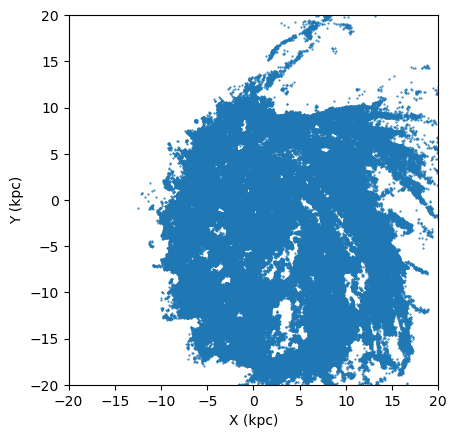

In [49]:
part640['gas']['position']

position = part640['gas'].prop('host.distance.principal') #setting variable for position
index = np.where(part640['gas'].prop('temperature') < 10**3)
gas_x640 = position[index][:,0] # the x position
gas_y640 = position[index][:,1] # the y position
gas_z640 = position[index][:,2] # the z position

fig1, ax = plt.subplots() #sets up plot
ax.scatter(gas_x640, gas_y640, s=1, marker='.') #make first plot x vs y with marker .
ax.set_xlabel('X (kpc)') #label x axis
ax.set_ylabel('Y (kpc)') #label y axis

ax.set_xlim([-20, 20]) #set x limit
ax.set_ylim([-20, 20]) #set y limit

ax.set_aspect('equal') #sets aspect ratio to equal

plt.show()

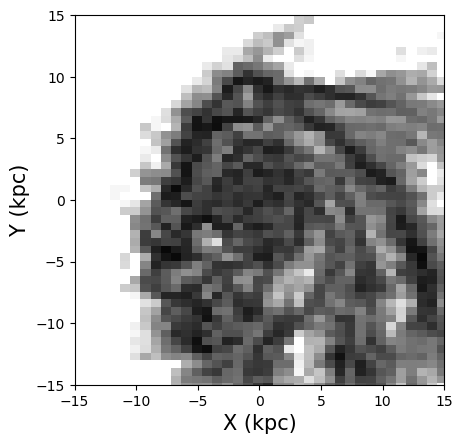

In [50]:
plt.style.use('default') #makes the background the default python

testcloud = np.arange(0, 1663, 1)  # First position in each array
fig1, ax = plt.subplots()

my_size = 15

### Gas cells
ax.hist2d(gas_x640, gas_y640, bins=22000, norm=LogNorm(), cmap='Greys') #make first 2D histogram

ax.set_xlabel("X (kpc)", fontsize = my_size) #sets x axis label
ax.set_ylabel("Y (kpc)", fontsize = my_size) #sets y axis label

ax.set_aspect('equal') #sets apsect ratio to be equal

ax.set_xlim([-15, 15]) #sets x limit at -15 to 15
ax.set_ylim([-15, 15]) #sets y limit at -15 to 15

plt.show() #shows plot

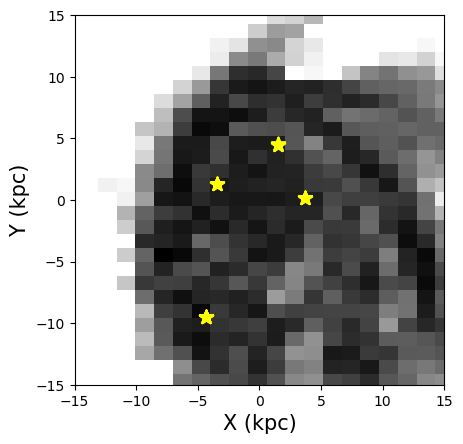

In [51]:
plt.style.use('default') #makes the background the default python

testcloud = np.arange(0, 1663, 1)  # First position in each array
fig1, ax = plt.subplots()

my_size = 15

### Gas cells
ax.hist2d(gas_x640, gas_y640, bins=12000, norm=LogNorm(), cmap='Greys') #make first 2D histogram

### 1st star cluster
#Drawing_colored_circle = plt.Circle(( xcm_singlecluster_1, ycm_singlecluster_1 ), 
                                    #rmax_singlecluster_1, color="red", alpha=0.5) 
                                    
#ax.add_artist( Drawing_colored_circle ) #draws circle
    
ax.scatter(x_singlecluster_1, y_singlecluster_1, facecolor="yellow", s=100, alpha=1, marker=r'*', 
           label="star cluster", edgecolor='yellow', linewidth=1.5)


### 2nd star cluster
#Drawing_colored_circle = plt.Circle(( xcm_singlecluster_2, ycm_singlecluster_2 ), 
                                    #rmax_singlecluster_2, color="red", alpha=0.5) 
                                    
#ax.add_artist( Drawing_colored_circle ) #draws circle
    
ax.scatter(x_singlecluster_2, y_singlecluster_2, facecolor="yellow", s=100, alpha=1, marker=r'*', 
            edgecolor='yellow', linewidth=1.5)


### 3rd star cluster
#Drawing_colored_circle = plt.Circle(( xcm_singlecluster_3, ycm_singlecluster_3 ), 
                                    #rmax_singlecluster_3, color="red", alpha=0.5) 
                                    
#ax.add_artist( Drawing_colored_circle ) #draws circle
    
ax.scatter(x_singlecluster_3, y_singlecluster_3, facecolor="yellow", s=100, alpha=1, marker=r'*', 
            edgecolor='yellow', linewidth=1.5)


### 4th star cluster
#Drawing_colored_circle = plt.Circle(( xcm_singlecluster_4, ycm_singlecluster_4 ), 
                                    #rmax_singlecluster_4, color="red", alpha=0.5) 
                                    
#ax.add_artist( Drawing_colored_circle ) #draws circle
    
ax.scatter(x_singlecluster_4, y_singlecluster_4, facecolor="yellow", s=100, alpha=1, marker=r'*', 
            edgecolor='yellow', linewidth=1.5)

ax.set_xlabel("X (kpc)", fontsize = my_size) #sets x axis label
ax.set_ylabel("Y (kpc)", fontsize = my_size) #sets y axis label

ax.set_aspect('equal') #sets apsect ratio to be equal

ax.set_xlim([-15, 15]) #sets x limit at -15 to 15
ax.set_ylim([-15, 15]) #sets y limit at -15 to 15

# Gas legend entry (blue dot)
#gas_legend = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='C0', markersize=10, label='Gas Cell')

# Star Cluster legend entry (yellow star with black outline)
#star_cluster_legend = plt.Line2D([0], [0], marker='*', color = 'w', markerfacecolor='yellow', markeredgecolor='black', markersize=10, label='Star Cluster')

# Create a legend with custom legend entries
#ax.legend(handles=[ star_cluster_legend], fontsize = 10)

#plt.savefig('plot_x_vs_y.pdf') #saves plot as a pdf
#plt.savefig('plot_x_vs_y.png') #saves plot as a png

plt.show() #shows plot

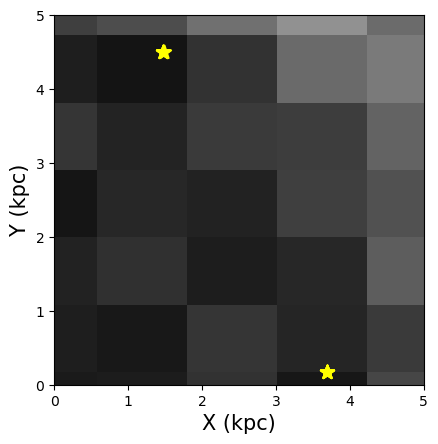

In [52]:
plt.style.use('default') #makes the background the default python

testcloud = np.arange(0, 1663, 1)  # First position in each array
fig1, ax = plt.subplots()

my_size = 15

### Gas cells
ax.hist2d(gas_x640, gas_y640, bins=15000, norm=LogNorm(), cmap='Greys') #make first 2D histogram

### 1st star cluster
#Drawing_colored_circle = plt.Circle(( xcm_singlecluster_1, ycm_singlecluster_1 ), 
                                    #rmax_singlecluster_1, color="red", alpha=0.5) 
                                    
#ax.add_artist( Drawing_colored_circle ) #draws circle
    
ax.scatter(x_singlecluster_1, y_singlecluster_1, facecolor="yellow", s=100, alpha=1, marker=r'*', 
           label="star cluster", edgecolor='yellow', linewidth=1.5)


### 2nd star cluster
#Drawing_colored_circle = plt.Circle(( xcm_singlecluster_2, ycm_singlecluster_2 ), 
                                    #rmax_singlecluster_2, color="red", alpha=0.5) 
                                    
#ax.add_artist( Drawing_colored_circle ) #draws circle
    
ax.scatter(x_singlecluster_2, y_singlecluster_2, facecolor="yellow", s=100, alpha=1, marker=r'*', 
            edgecolor='yellow', linewidth=1.5)


### 3rd star cluster
#Drawing_colored_circle = plt.Circle(( xcm_singlecluster_3, ycm_singlecluster_3 ), 
                                    #rmax_singlecluster_3, color="red", alpha=0.5) 
                                    
#ax.add_artist( Drawing_colored_circle ) #draws circle
    
ax.scatter(x_singlecluster_3, y_singlecluster_3, facecolor="yellow", s=100, alpha=1, marker=r'*', 
            edgecolor='yellow', linewidth=1.5)


### 4th star cluster
#Drawing_colored_circle = plt.Circle(( xcm_singlecluster_4, ycm_singlecluster_4 ), 
                                    #rmax_singlecluster_4, color="red", alpha=0.5) 
                                    
#ax.add_artist( Drawing_colored_circle ) #draws circle
    
ax.scatter(x_singlecluster_4, y_singlecluster_4, facecolor="yellow", s=100, alpha=1, marker=r'*', 
            edgecolor='yellow', linewidth=1.5)

ax.set_xlabel("X (kpc)", fontsize = my_size) #sets x axis label
ax.set_ylabel("Y (kpc)", fontsize = my_size) #sets y axis label

ax.set_aspect('equal') #sets apsect ratio to be equal

ax.set_xlim([0, 5]) #sets x limit at 0 to 5
ax.set_ylim([0, 5]) #sets y limit at 0 to 5

# Gas legend entry (blue dot)
#gas_legend = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='C0', markersize=10, label='Gas Cell')

# Star Cluster legend entry (yellow star with black outline)
#star_cluster_legend = plt.Line2D([0], [0], marker='*', color = 'w', markerfacecolor='yellow', markeredgecolor='black', markersize=10, label='Star Cluster')

# Create a legend with custom legend entries
#ax.legend(handles=[ star_cluster_legend], fontsize = 10)

#plt.savefig('plot_x_vs_y.pdf') #saves plot as a pdf
#plt.savefig('plot_x_vs_y.png') #saves plot as a png

plt.show() #shows plot